<h1 align="center"><font size="5">Automobile - Predict "Price"</font></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats

In [2]:
warnings.filterwarnings("ignore")

In [3]:
columns =['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [4]:
automobile= pd.read_csv('imports_85.csv',header=None,names=columns)
automobile

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
automobile.shape

(205, 26)

## Exploration

## Xác định thuộc tính
* Output: Price
* Input: <> Price

In [6]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

* Nhận xét: các cột bore, stroke, horsepower, peak-rpm, price bị sai kiểu dữ liệu

In [7]:
automobile=automobile.replace('?',np.nan)

In [8]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
automobile['normalized-losses']=automobile['normalized-losses'].astype('float')
automobile['bore']=automobile['bore'].astype('float')
automobile['stroke']=automobile['stroke'].astype('float')
automobile['horsepower']=automobile['horsepower'].astype('float')
automobile['peak-rpm']=automobile['peak-rpm'].astype('float')
automobile['price']=automobile['price'].astype('float')

In [10]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
numbers = [col for col in automobile.columns if automobile[col].dtypes != object]
numbers

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [12]:
objects = [col for col in automobile.columns if automobile[col].dtypes == object]
objects

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [13]:
# categorical
i=1
for obj in objects:
    print(i,'/',obj,len(automobile[obj].unique()),': ',automobile[obj].unique() if len(automobile[obj].unique())<100 else '')
    i=i+1

1 / make 22 :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
2 / fuel-type 2 :  ['gas' 'diesel']
3 / aspiration 2 :  ['std' 'turbo']
4 / num-of-doors 3 :  ['two' 'four' nan]
5 / body-style 5 :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
6 / drive-wheels 3 :  ['rwd' 'fwd' '4wd']
7 / engine-location 2 :  ['front' 'rear']
8 / engine-type 7 :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
9 / num-of-cylinders 7 :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
10 / fuel-system 8 :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


### Nhận xét: Biến phân loại gồm:
* fuel-type, aspiration, num-of-doors, body-style, engine-location, engine-type, num-of-cylinders, fuel-system

In [14]:
# Categorical và Numeruous
i=1
for num in numbers:
    print(i,'/',num,len(automobile[num].unique()),': ',automobile[num].unique() if len(automobile[num].unique())<100 else '')
    i=i+1

1 / symboling 6 :  [ 3  1  2  0 -1 -2]
2 / normalized-losses 52 :  [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
3 / wheel-base 53 :  [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
4 / length 75 :  [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 1

### Nhận xét: 
* Biến phân loại: symboling

In [15]:
lst_categories=['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system','symboling']
lst_continuous=['wheel-base','normalized-losses','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

## Phân tích đơn biến

### Continuous variables

In [16]:
def phan_tich_don_bien_cont(col):
    print('----------------------------------',col,'-------------------------------------------')
    print(automobile[col].describe())
    print('meadian:',automobile[col].median())
    print('mode:',automobile[col].mode())
    print('range:',np.ptp(automobile[col].dropna()))
    print('variance:',automobile[col].var())
    print('skew:',automobile[col].skew())
    if automobile[col].skew() >0:
        print('=> Phân phối lẹch phải')
    elif automobile[col].skew() == 0:
        print('=> phân phối chuẩn')
    else:
        print('=> phân phối lệch trái')
    print('kur:',automobile[col].kurtosis())
    if automobile[col].kurtosis() >0:
        print('=> Phân phối nhọn')
    elif automobile[col].kurtosis() == 0:
        print('=> phân phối chuẩn')
    else:
        print('=> phân phối bẹt')
    print('IQR:',scipy.stats.iqr(automobile[col].dropna()))
    Outliers_Upper=automobile[automobile[col] > np.percentile(automobile[col].dropna(),75)+1.5*scipy.stats.iqr(automobile[col].dropna())]
    Outliers_Lower=automobile[automobile[col] < np.percentile(automobile[col].dropna(),25)-1.5*scipy.stats.iqr(automobile[col].dropna())]
    plt.subplots(1,2,figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(automobile[col].dropna())
    plt.subplot(1,2,2)
    sns.boxplot(automobile[col].dropna())
    plt.show()
    print('Số Outliers có trong cột ',col,' là: ',Outliers_Upper.shape[0]+Outliers_Lower.shape[0])

---------------------------------- wheel-base -------------------------------------------
count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64
meadian: 97.0
mode: 0    94.5
dtype: float64
range: 34.30000000000001
variance: 36.261782400765185
skew: 1.0502137758714858
=> Phân phối lẹch phải
kur: 1.0170389463774234
=> Phân phối nhọn
IQR: 7.900000000000006


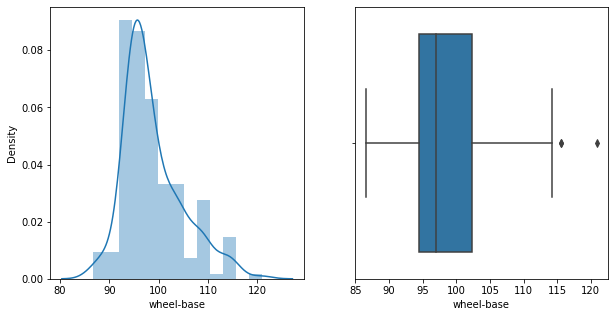

Số Outliers có trong cột  wheel-base  là:  3
---------------------------------- normalized-losses -------------------------------------------
count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64
meadian: 115.0
mode: 0    161.0
dtype: float64
range: 191.0
variance: 1256.1472392638036
skew: 0.7659764175950632
=> Phân phối lẹch phải
kur: 0.525440385629738
=> Phân phối nhọn
IQR: 56.0


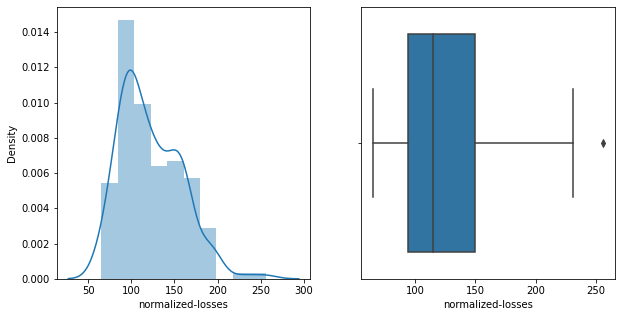

Số Outliers có trong cột  normalized-losses  là:  1
---------------------------------- length -------------------------------------------
count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64
meadian: 173.2
mode: 0    157.3
dtype: float64
range: 67.0
variance: 152.2086881874701
skew: 0.1559537713215604
=> Phân phối lẹch phải
kur: -0.08289485344758996
=> phân phối bẹt
IQR: 16.799999999999983


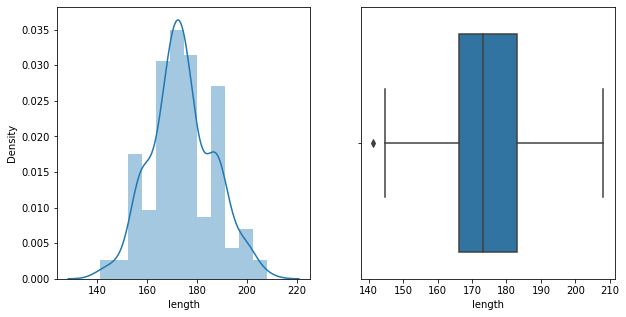

Số Outliers có trong cột  length  là:  1
---------------------------------- width -------------------------------------------
count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64
meadian: 65.5
mode: 0    63.8
dtype: float64
range: 12.0
variance: 4.601899569583934
skew: 0.904003498786254
=> Phân phối lẹch phải
kur: 0.7027642441369477
=> Phân phối nhọn
IQR: 2.8000000000000114


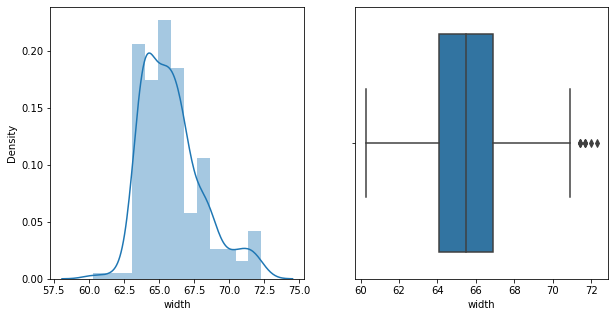

Số Outliers có trong cột  width  là:  8
---------------------------------- height -------------------------------------------
count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64
meadian: 54.1
mode: 0    50.8
dtype: float64
range: 12.0
variance: 5.97079961740794
skew: 0.06312273247192804
=> Phân phối lẹch phải
kur: -0.4438123650575503
=> phân phối bẹt
IQR: 3.5


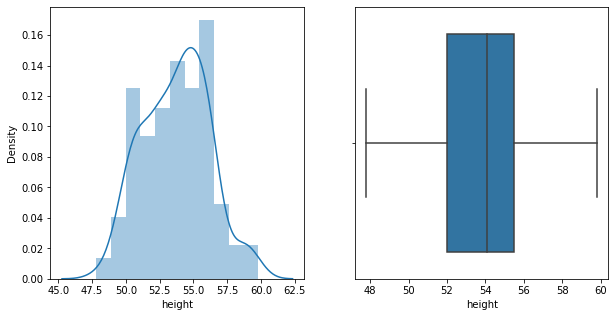

Số Outliers có trong cột  height  là:  0
---------------------------------- curb-weight -------------------------------------------
count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb-weight, dtype: float64
meadian: 2414.0
mode: 0    2385
dtype: int64
range: 2578
variance: 271107.8743185079
skew: 0.681398189052588
=> Phân phối lẹch phải
kur: -0.04285376609990976
=> phân phối bẹt
IQR: 790.0


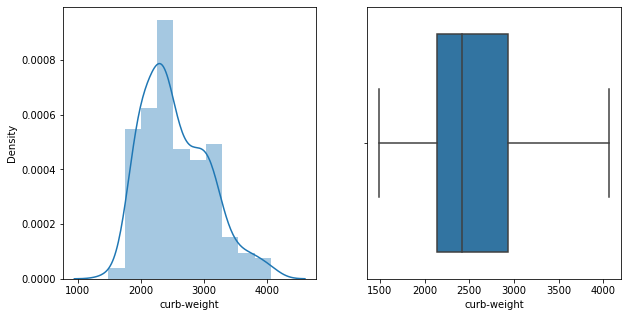

Số Outliers có trong cột  curb-weight  là:  0
---------------------------------- engine-size -------------------------------------------
count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64
meadian: 120.0
mode: 0     92
1    122
dtype: int64
range: 265
variance: 1734.1139167862266
skew: 1.9476550452788108
=> Phân phối lẹch phải
kur: 5.305682091703767
=> Phân phối nhọn
IQR: 44.0


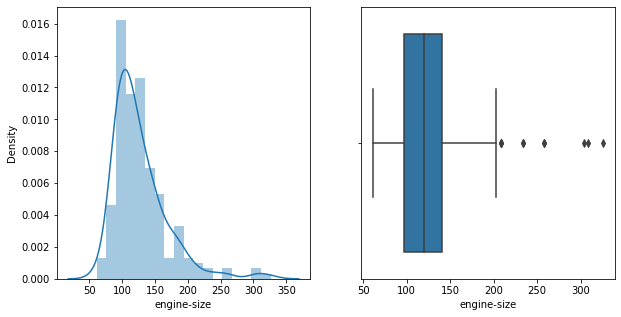

Số Outliers có trong cột  engine-size  là:  10
---------------------------------- bore -------------------------------------------
count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64
meadian: 3.31
mode: 0    3.62
dtype: float64
range: 1.4
variance: 0.07482343781094528
skew: 0.020015510309870796
=> Phân phối lẹch phải
kur: -0.8289454004870165
=> phân phối bẹt
IQR: 0.43999999999999995


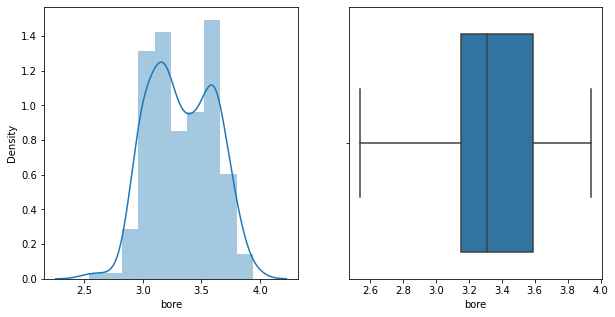

Số Outliers có trong cột  bore  là:  0
---------------------------------- stroke -------------------------------------------
count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64
meadian: 3.29
mode: 0    3.4
dtype: float64
range: 2.1
variance: 0.10030994527363188
skew: -0.6831221940577341
=> phân phối lệch trái
kur: 2.0742434681742274
=> Phân phối nhọn
IQR: 0.30000000000000027


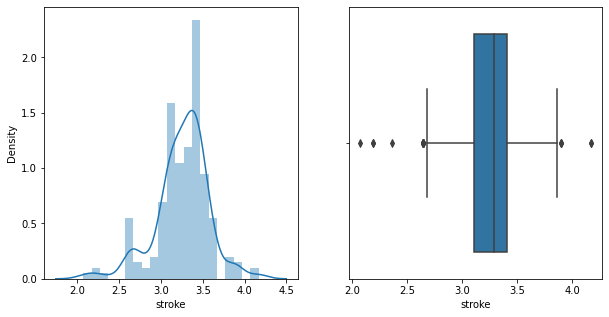

Số Outliers có trong cột  stroke  là:  20
---------------------------------- compression-ratio -------------------------------------------
count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression-ratio, dtype: float64
meadian: 9.0
mode: 0    9.0
dtype: float64
range: 16.0
variance: 15.777104318507893
skew: 2.6108624576151533
=> Phân phối lẹch phải
kur: 5.233054347604856
=> Phân phối nhọn
IQR: 0.8000000000000007


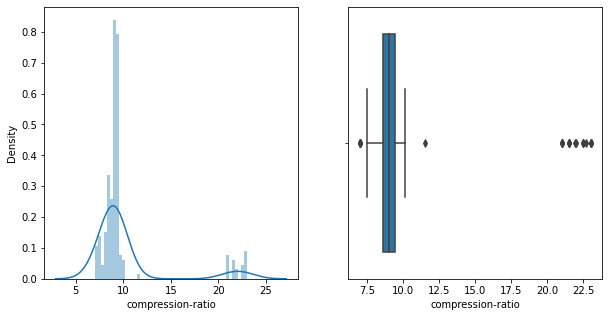

Số Outliers có trong cột  compression-ratio  là:  28
---------------------------------- horsepower -------------------------------------------
count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64
meadian: 95.0
mode: 0    68.0
dtype: float64
range: 240.0
variance: 1577.2310881334438
skew: 1.3910294937929355
=> Phân phối lẹch phải
kur: 2.6232797942177686
=> Phân phối nhọn
IQR: 46.0


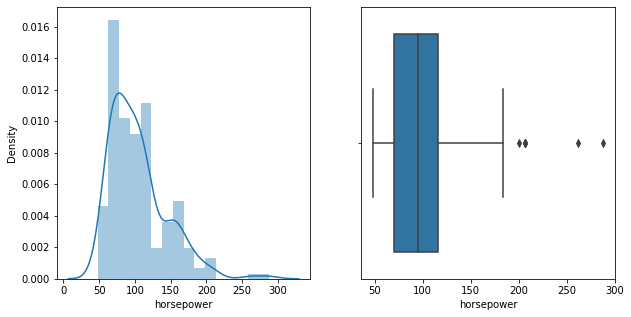

Số Outliers có trong cột  horsepower  là:  6
---------------------------------- peak-rpm -------------------------------------------
count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64
meadian: 5200.0
mode: 0    5500.0
dtype: float64
range: 2450.0
variance: 229761.62025069498
skew: 0.07323669149378209
=> Phân phối lẹch phải
kur: 0.056526492158017305
=> Phân phối nhọn
IQR: 700.0


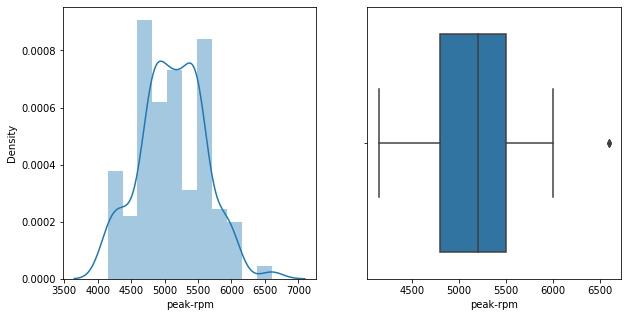

Số Outliers có trong cột  peak-rpm  là:  2
---------------------------------- city-mpg -------------------------------------------
count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64
meadian: 24.0
mode: 0    31
dtype: int64
range: 36
variance: 42.79961740793879
skew: 0.6637040288148164
=> Phân phối lẹch phải
kur: 0.5786483404849747
=> Phân phối nhọn
IQR: 11.0


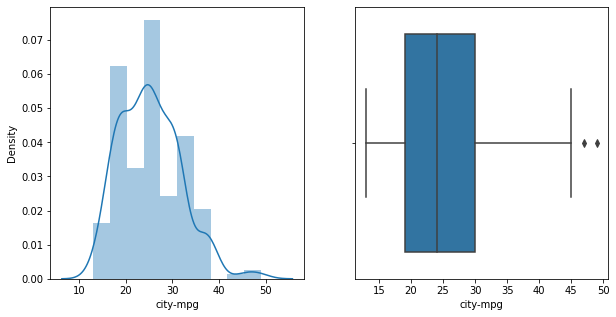

Số Outliers có trong cột  city-mpg  là:  2
---------------------------------- highway-mpg -------------------------------------------
count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64
meadian: 30.0
mode: 0    25
dtype: int64
range: 38
variance: 47.42309899569584
skew: 0.5399971878746754
=> Phân phối lẹch phải
kur: 0.44007038152989786
=> Phân phối nhọn
IQR: 9.0


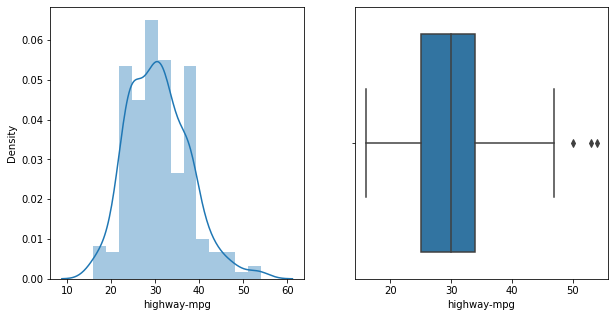

Số Outliers có trong cột  highway-mpg  là:  3
---------------------------------- price -------------------------------------------
count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64
meadian: 10295.0
mode: 0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
dtype: float64
range: 40282.0
variance: 63155863.44318408
skew: 1.8096753390980749
=> Phân phối lẹch phải
kur: 3.2315368868295193
=> Phân phối nhọn
IQR: 8725.0


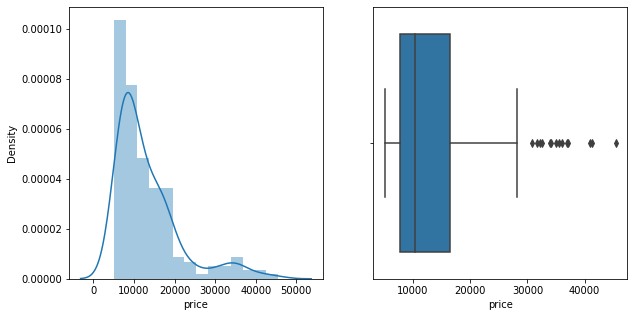

Số Outliers có trong cột  price  là:  14


In [17]:
for col in lst_continuous:
    phan_tich_don_bien_cont(col)

### categories variables

In [18]:
def phan_tich_don_bien_cate(col):
    print('----------------------',col,'----------------------------')
    print(automobile[col].value_counts())
    automobile[col].value_counts().plot.bar()
    plt.xticks(rotation=0)
    plt.show()

---------------------- fuel-type ----------------------------
gas       185
diesel     20
Name: fuel-type, dtype: int64


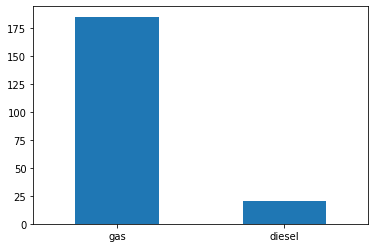

---------------------- aspiration ----------------------------
std      168
turbo     37
Name: aspiration, dtype: int64


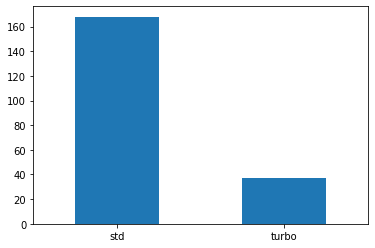

---------------------- num-of-doors ----------------------------
four    114
two      89
Name: num-of-doors, dtype: int64


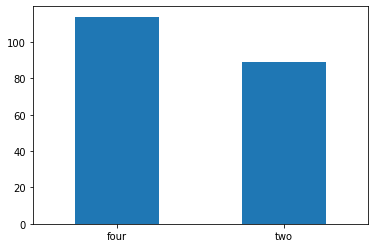

---------------------- body-style ----------------------------
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


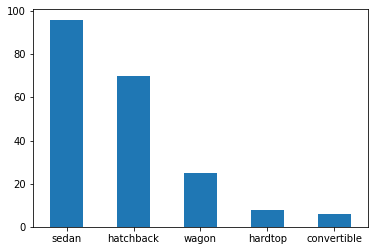

---------------------- engine-location ----------------------------
front    202
rear       3
Name: engine-location, dtype: int64


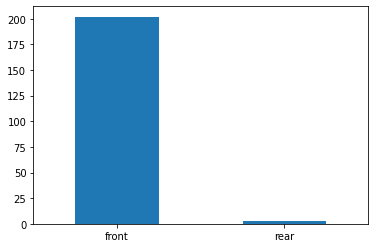

---------------------- engine-type ----------------------------
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64


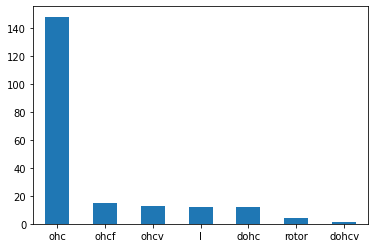

---------------------- num-of-cylinders ----------------------------
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64


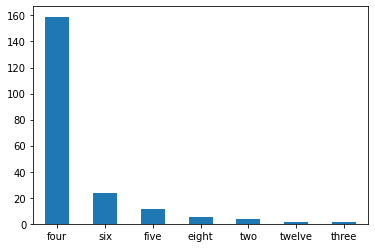

---------------------- fuel-system ----------------------------
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64


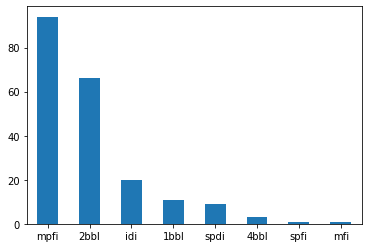

---------------------- symboling ----------------------------
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


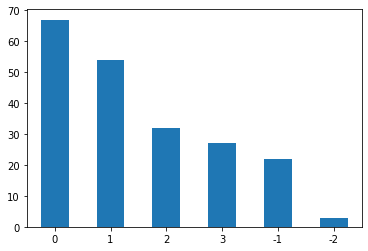

In [19]:
for col in lst_categories:
    phan_tich_don_bien_cate(col)

## Phân tích hai biến

* Continuous - Continuous

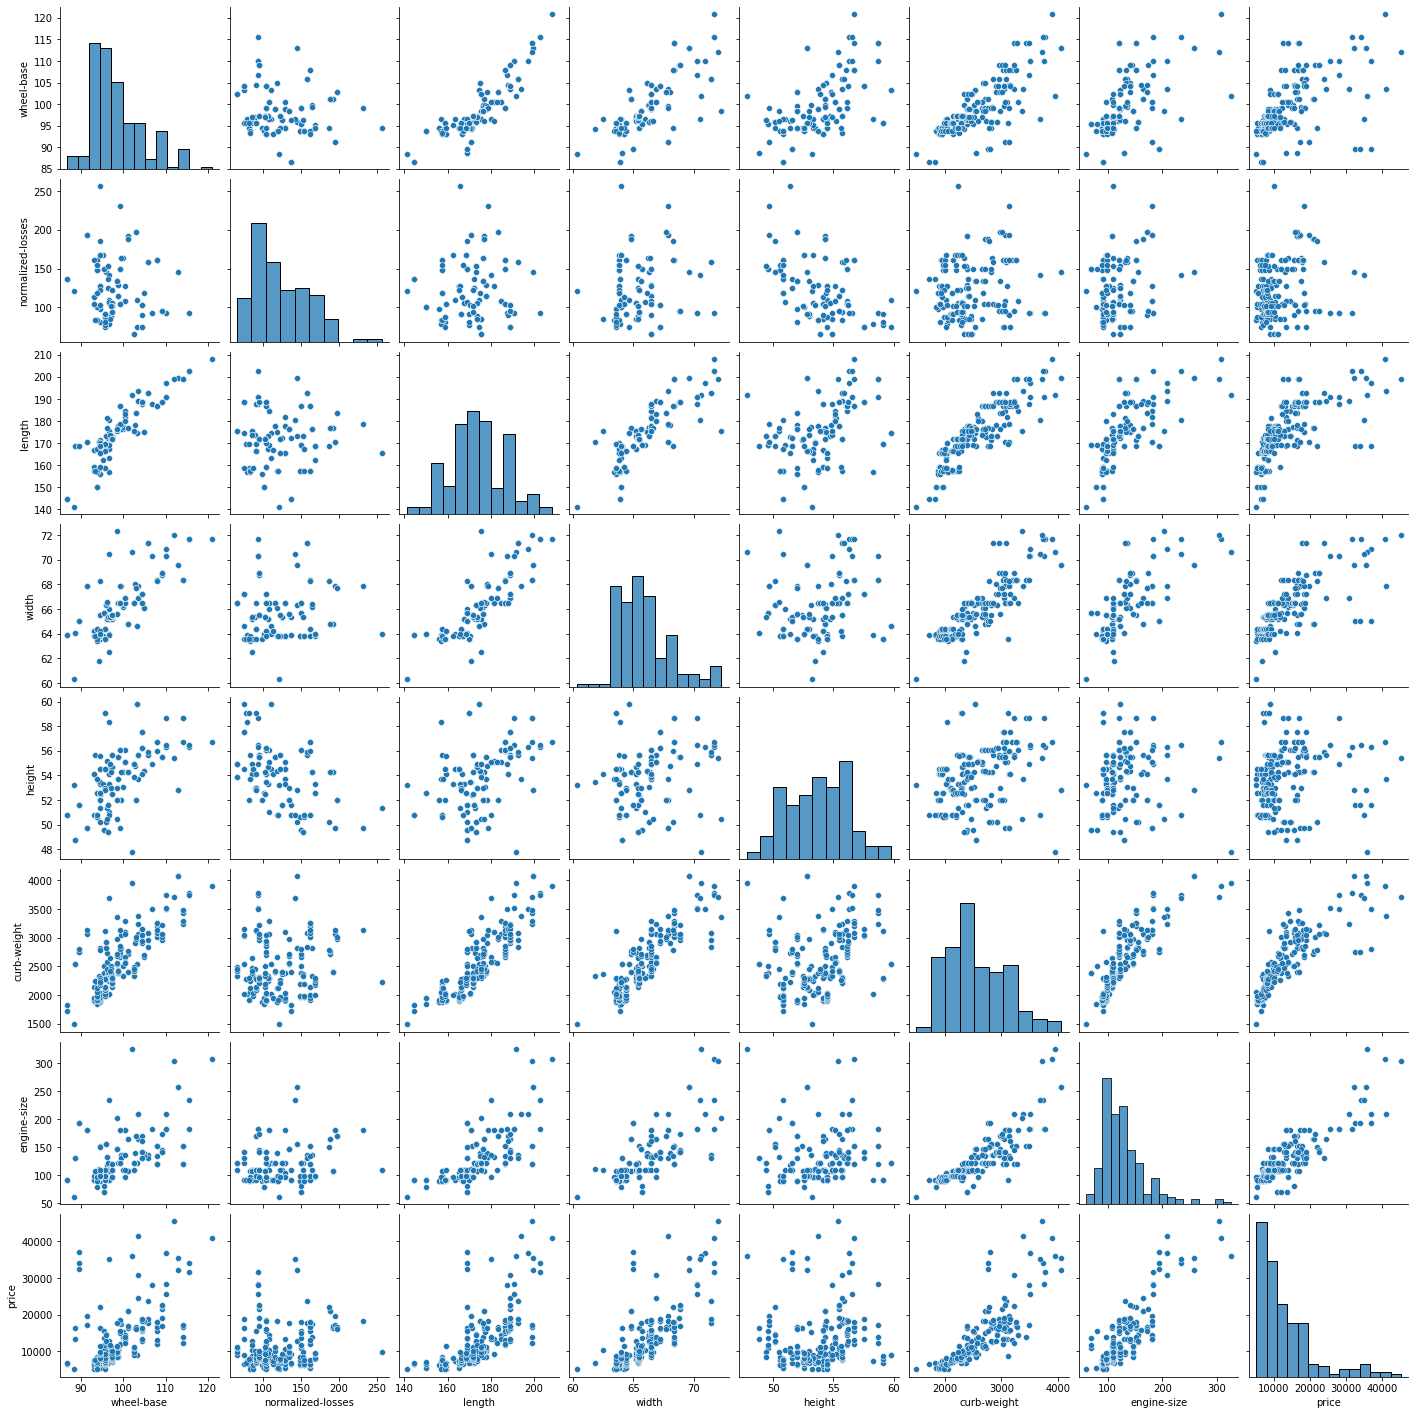

In [20]:
sns.pairplot(automobile[['wheel-base','normalized-losses','length','width','height','curb-weight','engine-size','price']])
plt.show()

In [21]:
automobile[['wheel-base','normalized-losses','length','width','height','curb-weight','engine-size','price']].corr()

,wheel-base,normalized-losses,length,width,height,curb-weight,engine-size,price
wheel-base,1.000000,-0.074362,0.874587,0.795144,0.589435,0.776386,0.569329,0.584642
normalized-losses,-0.074362,1.000000,0.023220,0.105073,-0.432335,0.119893,0.167365,0.203254
length,0.874587,0.023220,1.000000,0.841118,0.491029,0.877728,0.683360,0.690628
width,0.795144,0.105073,0.841118,1.000000,0.279210,0.867032,0.735433,0.751265
height,0.589435,-0.432335,0.491029,0.279210,1.000000,0.295572,0.067149,0.135486
curb-weight,0.776386,0.119893,0.877728,0.867032,0.295572,1.000000,0.850594,0.834415
engine-size,0.569329,0.167365,0.683360,0.735433,0.067149,0.850594,1.000000,0.872335
price,0.584642,0.203254,0.690628,0.751265,0.135486,0.834415,0.872335,1.000000


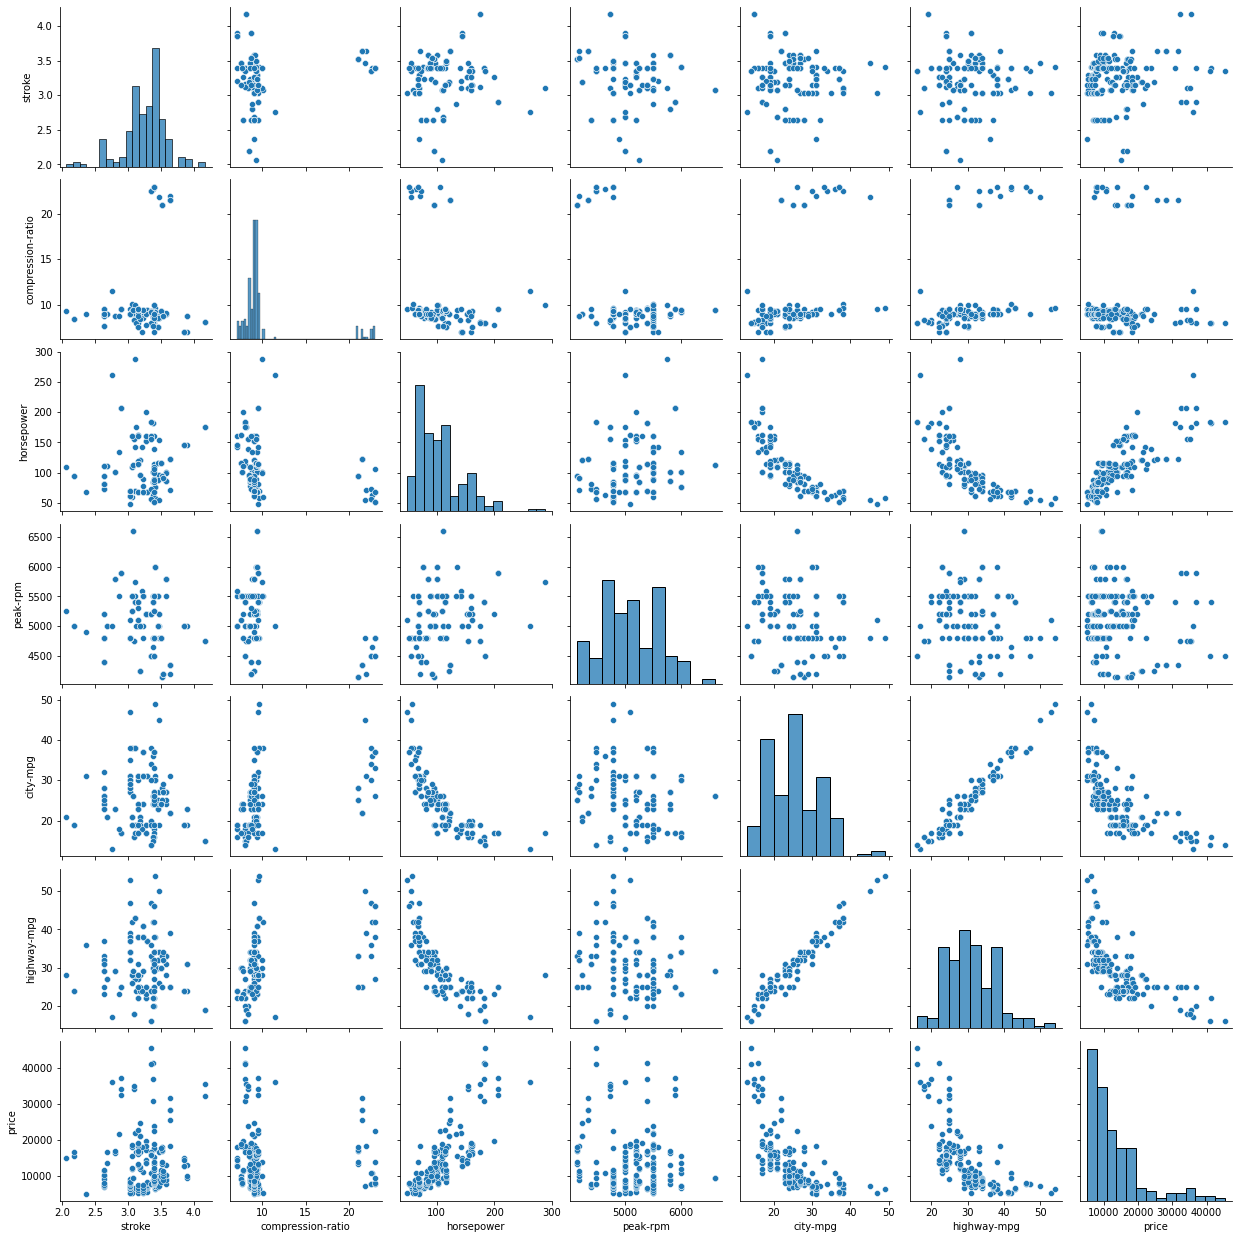

In [22]:
sns.pairplot(automobile[['stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']])
plt.show()

In [23]:
automobile[['stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']].corr()

,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
stroke,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310
compression-ratio,0.186170,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107
horsepower,0.090254,-0.205874,1.000000,0.130971,-0.803620,-0.770908,0.810533
peak-rpm,-0.071493,-0.436221,0.130971,1.000000,-0.113788,-0.054257,-0.101649
city-mpg,-0.042906,0.324701,-0.803620,-0.113788,1.000000,0.971337,-0.686571
highway-mpg,-0.044528,0.265201,-0.770908,-0.054257,0.971337,1.000000,-0.704692
price,0.082310,0.071107,0.810533,-0.101649,-0.686571,-0.704692,1.000000


In [24]:
# Nhận xét có 4 thuộc tính Input ko phụ thuộc vào price
automobile.drop(['height','normalized-losses','compression-ratio','stroke','peak-rpm'],axis=1,inplace=True)

* Categorical - Categorical

In [25]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [26]:
def phan_tich_hai_bien_cate_cate(col1,col2):
    print('-------------------',col1,'---',col2,'----------------------')
    table=pd.crosstab(automobile[col1],automobile[col2])
    print(table)
    table.plot(kind='bar',stacked=True)
    plt.show()
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d'%dof)
    print('p=',p)
    prob=0.95
    critical = chi2.ppf(prob,dof)
    print('probability=%.3f,critcal=%.3f,stat=%.3f'%(prob,critical,stat))
    alpha=1-prob
    print('significance= %.3f,p=%.3f' % (alpha,p))
    print('H0: ',col1,' and ',col2,' Independent')
    if p<=alpha:
        print('Dependent: Reject H0')
    else:
        print('Indepent: Accept H0')

------------------- fuel-type --- aspiration ----------------------
aspiration  std  turbo
fuel-type             
diesel        7     13
gas         161     24


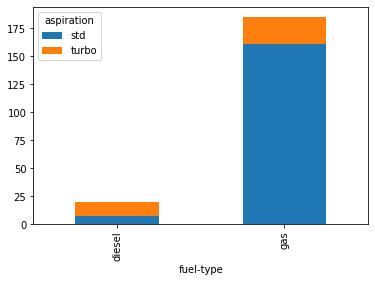

dof=1
p= 5.2947382636786724e-08
probability=0.950,critcal=3.841,stat=29.606
significance= 0.050,p=0.000
H0:  fuel-type  and  aspiration  Independent
Dependent: Reject H0
------------------- fuel-type --- num-of-doors ----------------------
num-of-doors  four  two
fuel-type              
diesel          16    3
gas             98   86


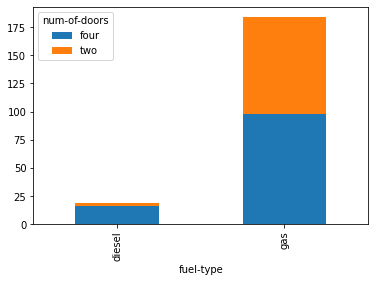

dof=1
p= 0.018994136261528762
probability=0.950,critcal=3.841,stat=5.502
significance= 0.050,p=0.019
H0:  fuel-type  and  num-of-doors  Independent
Dependent: Reject H0
------------------- fuel-type --- body-style ----------------------
body-style  convertible  hardtop  hatchback  sedan  wagon
fuel-type                                                
diesel                0        1          1     15      3
gas                   6        7         69     81     22


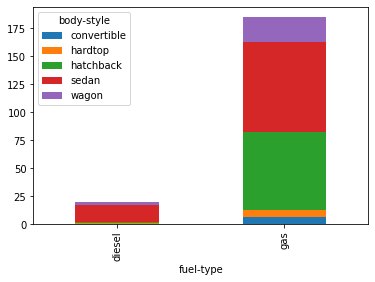

dof=4
p= 0.038304347063053835
probability=0.950,critcal=9.488,stat=10.129
significance= 0.050,p=0.038
H0:  fuel-type  and  body-style  Independent
Dependent: Reject H0
------------------- fuel-type --- engine-location ----------------------
engine-location  front  rear
fuel-type                   
diesel              20     0
gas                182     3


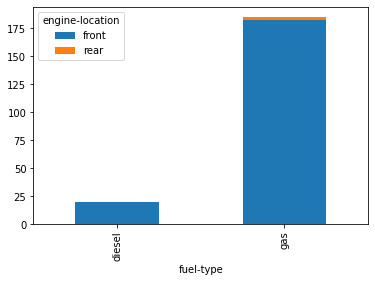

dof=1
p= 0.6844659145015766
probability=0.950,critcal=3.841,stat=0.165
significance= 0.050,p=0.684
H0:  fuel-type  and  engine-location  Independent
Indepent: Accept H0
------------------- fuel-type --- engine-type ----------------------
engine-type  dohc  dohcv  l  ohc  ohcf  ohcv  rotor
fuel-type                                          
diesel          0      0  5   15     0     0      0
gas            12      1  7  133    15    13      4


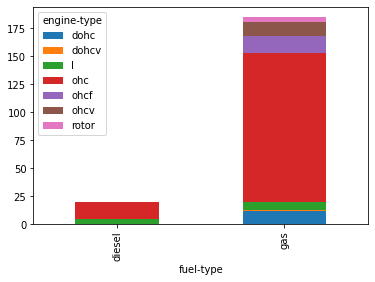

dof=6
p= 0.004574004556642926
probability=0.950,critcal=12.592,stat=18.768
significance= 0.050,p=0.005
H0:  fuel-type  and  engine-type  Independent
Dependent: Reject H0
------------------- fuel-type --- num-of-cylinders ----------------------
num-of-cylinders  eight  five  four  six  three  twelve  two
fuel-type                                                   
diesel                0     4    15    1      0       0    0
gas                   5     7   144   23      1       1    4


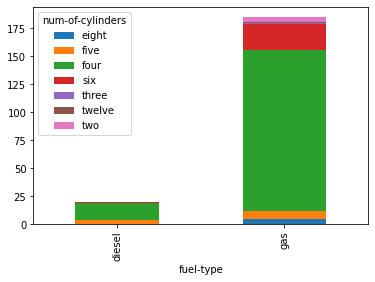

dof=6
p= 0.09136455582612629
probability=0.950,critcal=12.592,stat=10.905
significance= 0.050,p=0.091
H0:  fuel-type  and  num-of-cylinders  Independent
Indepent: Accept H0
------------------- fuel-type --- fuel-system ----------------------
fuel-system  1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
fuel-type                                                
diesel          0     0     0   20    0     0     0     0
gas            11    66     3    0    1    94     9     1


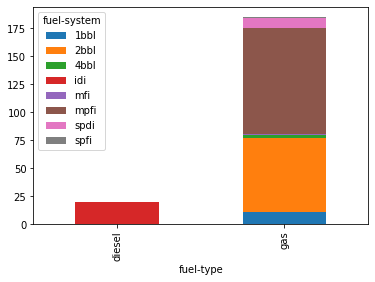

dof=7
p= 1.0015359060100295e-40
probability=0.950,critcal=14.067,stat=205.000
significance= 0.050,p=0.000
H0:  fuel-type  and  fuel-system  Independent
Dependent: Reject H0
------------------- fuel-type --- symboling ----------------------
symboling  -2  -1   0   1   2   3
fuel-type                        
diesel      0   5  11   1   3   0
gas         3  17  56  53  29  27


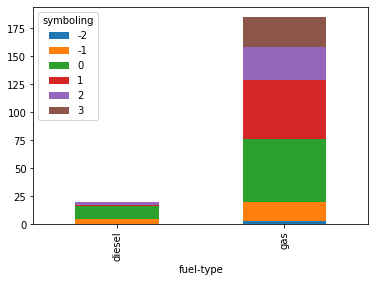

dof=5
p= 0.011908603064136864
probability=0.950,critcal=11.070,stat=14.662
significance= 0.050,p=0.012
H0:  fuel-type  and  symboling  Independent
Dependent: Reject H0
------------------- aspiration --- num-of-doors ----------------------
num-of-doors  four  two
aspiration             
std             92   75
turbo           22   14


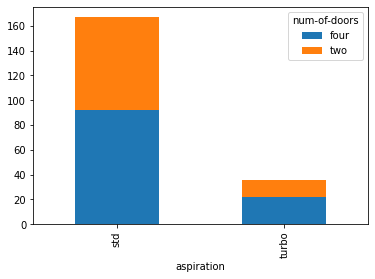

dof=1
p= 0.6346269589352194
probability=0.950,critcal=3.841,stat=0.226
significance= 0.050,p=0.635
H0:  aspiration  and  num-of-doors  Independent
Indepent: Accept H0
------------------- aspiration --- body-style ----------------------
body-style  convertible  hardtop  hatchback  sedan  wagon
aspiration                                               
std                   6        7         57     78     20
turbo                 0        1         13     18      5


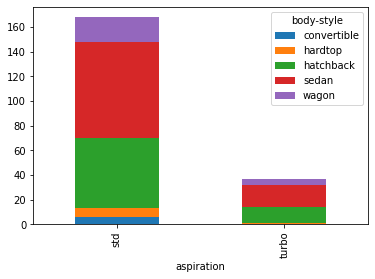

dof=4
p= 0.80930506676834
probability=0.950,critcal=9.488,stat=1.597
significance= 0.050,p=0.809
H0:  aspiration  and  body-style  Independent
Indepent: Accept H0
------------------- aspiration --- engine-location ----------------------
engine-location  front  rear
aspiration                  
std                165     3
turbo               37     0


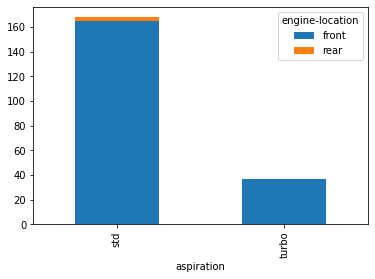

dof=1
p= 0.9500012009090527
probability=0.950,critcal=3.841,stat=0.004
significance= 0.050,p=0.950
H0:  aspiration  and  engine-location  Independent
Indepent: Accept H0
------------------- aspiration --- engine-type ----------------------
engine-type  dohc  dohcv  l  ohc  ohcf  ohcv  rotor
aspiration                                         
std            10      1  6  122    13    12      4
turbo           2      0  6   26     2     1      0


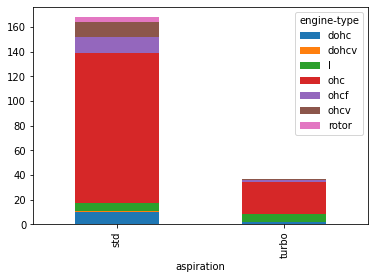

dof=6
p= 0.10189216579455926
probability=0.950,critcal=12.592,stat=10.590
significance= 0.050,p=0.102
H0:  aspiration  and  engine-type  Independent
Indepent: Accept H0
------------------- aspiration --- num-of-cylinders ----------------------
num-of-cylinders  eight  five  four  six  three  twelve  two
aspiration                                                  
std                   5     5   130   22      1       1    4
turbo                 0     6    29    2      0       0    0


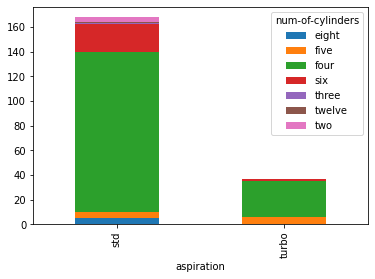

dof=6
p= 0.03119265340373247
probability=0.950,critcal=12.592,stat=13.864
significance= 0.050,p=0.031
H0:  aspiration  and  num-of-cylinders  Independent
Dependent: Reject H0
------------------- aspiration --- fuel-system ----------------------
fuel-system  1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
aspiration                                               
std            11    66     3    7    0    79     1     1
turbo           0     0     0   13    1    15     8     0


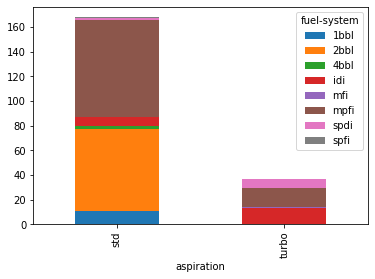

dof=7
p= 3.3623838234128203e-15
probability=0.950,critcal=14.067,stat=83.000
significance= 0.050,p=0.000
H0:  aspiration  and  fuel-system  Independent
Dependent: Reject H0
------------------- aspiration --- symboling ----------------------
symboling   -2  -1   0   1   2   3
aspiration                        
std          2  14  56  47  30  19
turbo        1   8  11   7   2   8


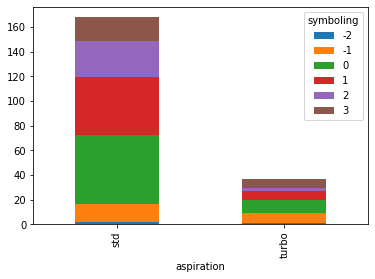

dof=5
p= 0.034956780754813205
probability=0.950,critcal=11.070,stat=11.988
significance= 0.050,p=0.035
H0:  aspiration  and  symboling  Independent
Dependent: Reject H0
------------------- num-of-doors --- body-style ----------------------
body-style    convertible  hardtop  hatchback  sedan  wagon
num-of-doors                                               
four                    0        0         10     79     25
two                     6        8         60     15      0


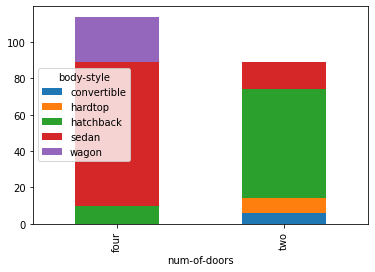

dof=4
p= 2.353237479105883e-24
probability=0.950,critcal=9.488,stat=116.984
significance= 0.050,p=0.000
H0:  num-of-doors  and  body-style  Independent
Dependent: Reject H0
------------------- num-of-doors --- engine-location ----------------------
engine-location  front  rear
num-of-doors                
four               114     0
two                 86     3


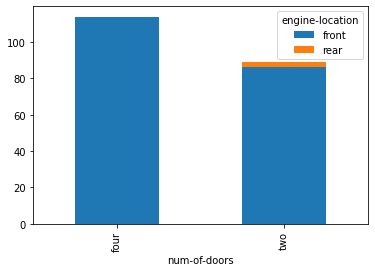

dof=1
p= 0.16489324683608142
probability=0.950,critcal=3.841,stat=1.929
significance= 0.050,p=0.165
H0:  num-of-doors  and  engine-location  Independent
Indepent: Accept H0
------------------- num-of-doors --- engine-type ----------------------
engine-type   dohc  dohcv   l  ohc  ohcf  ohcv  rotor
num-of-doors                                         
four             5      0  11   83     9     6      0
two              7      1   1   63     6     7      4


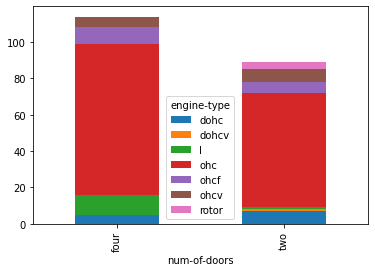

dof=6
p= 0.027271147039390424
probability=0.950,critcal=12.592,stat=14.220
significance= 0.050,p=0.027
H0:  num-of-doors  and  engine-type  Independent
Dependent: Reject H0
------------------- num-of-doors --- num-of-cylinders ----------------------
num-of-cylinders  eight  five  four  six  three  twelve  two
num-of-doors                                                
four                  2     8    91   13      0       0    0
two                   3     3    66   11      1       1    4


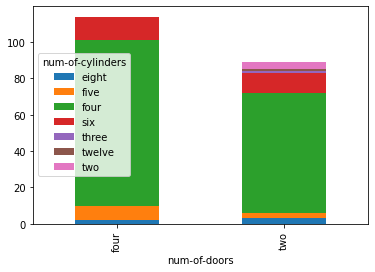

dof=6
p= 0.13840206845293562
probability=0.950,critcal=12.592,stat=9.688
significance= 0.050,p=0.138
H0:  num-of-doors  and  num-of-cylinders  Independent
Indepent: Accept H0
------------------- num-of-doors --- fuel-system ----------------------
fuel-system   1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
num-of-doors                                              
four             4    38     0   16    0    54     2     0
two              7    28     3    3    1    39     7     1


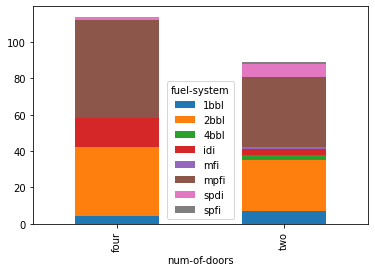

dof=7
p= 0.00943278148338325
probability=0.950,critcal=14.067,stat=18.629
significance= 0.050,p=0.009
H0:  num-of-doors  and  fuel-system  Independent
Dependent: Reject H0
------------------- num-of-doors --- symboling ----------------------
symboling     -2  -1   0   1   2   3
num-of-doors                        
four           3  22  59  20  10   0
two            0   0   7  33  22  27


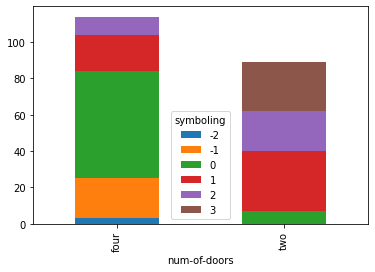

dof=5
p= 8.249867022846019e-20
probability=0.950,critcal=11.070,stat=99.082
significance= 0.050,p=0.000
H0:  num-of-doors  and  symboling  Independent
Dependent: Reject H0
------------------- body-style --- engine-location ----------------------
engine-location  front  rear
body-style                  
convertible          5     1
hardtop              6     2
hatchback           70     0
sedan               96     0
wagon               25     0


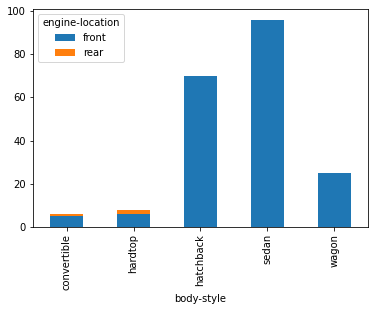

dof=4
p= 9.460793882389761e-09
probability=0.950,critcal=9.488,stat=43.188
significance= 0.050,p=0.000
H0:  body-style  and  engine-location  Independent
Dependent: Reject H0
------------------- body-style --- engine-type ----------------------
engine-type  dohc  dohcv  l  ohc  ohcf  ohcv  rotor
body-style                                         
convertible     2      0  0    2     1     1      0
hardtop         0      0  0    5     2     1      0
hatchback       4      1  1   53     3     4      4
sedan           5      0  7   73     5     6      0
wagon           1      0  4   15     4     1      0


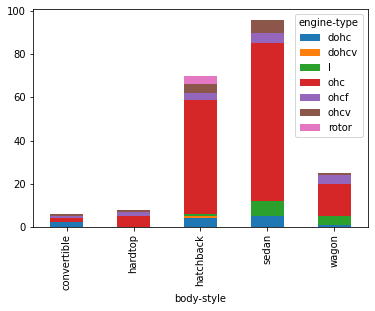

dof=24
p= 0.034034776735517504
probability=0.950,critcal=36.415,stat=38.079
significance= 0.050,p=0.034
H0:  body-style  and  engine-type  Independent
Dependent: Reject H0
------------------- body-style --- num-of-cylinders ----------------------
num-of-cylinders  eight  five  four  six  three  twelve  two
body-style                                                  
convertible           1     0     4    1      0       0    0
hardtop               1     1     4    2      0       0    0
hatchback             1     1    57    6      1       0    4
sedan                 2     7    73   13      0       1    0
wagon                 0     2    21    2      0       0    0


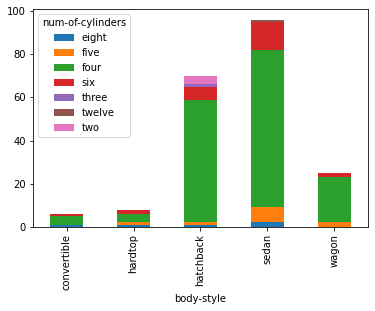

dof=24
p= 0.2692583400595563
probability=0.950,critcal=36.415,stat=27.784
significance= 0.050,p=0.269
H0:  body-style  and  num-of-cylinders  Independent
Indepent: Accept H0
------------------- body-style --- fuel-system ----------------------
fuel-system  1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
body-style                                               
convertible     0     0     0    0    0     6     0     0
hardtop         0     1     0    1    0     6     0     0
hatchback       7    28     3    1    1    22     7     1
sedan           3    28     0   15    0    48     2     0
wagon           1     9     0    3    0    12     0     0


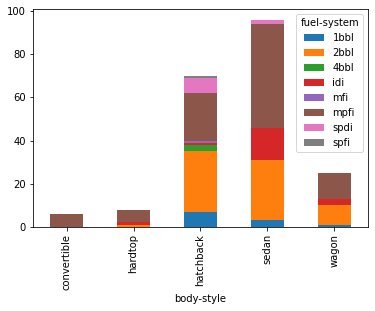

dof=28
p= 0.023647078325253548
probability=0.950,critcal=41.337,stat=44.702
significance= 0.050,p=0.024
H0:  body-style  and  fuel-system  Independent
Dependent: Reject H0
------------------- body-style --- symboling ----------------------
symboling    -2  -1   0   1   2   3
body-style                         
convertible   0   0   0   0   1   5
hardtop       0   0   1   1   4   2
hatchback     0   2   8  27  13  20
sedan         3  13  43  23  14   0
wagon         0   7  15   3   0   0


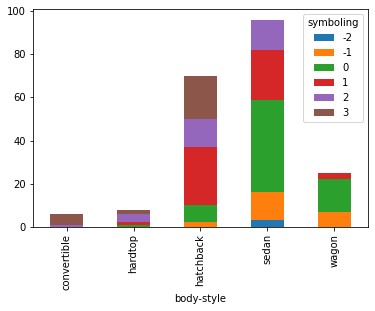

dof=20
p= 2.140420588694039e-14
probability=0.950,critcal=31.410,stat=109.795
significance= 0.050,p=0.000
H0:  body-style  and  symboling  Independent
Dependent: Reject H0
------------------- engine-location --- engine-type ----------------------
engine-type      dohc  dohcv   l  ohc  ohcf  ohcv  rotor
engine-location                                         
front              12      1  12  148    12    13      4
rear                0      0   0    0     3     0      0


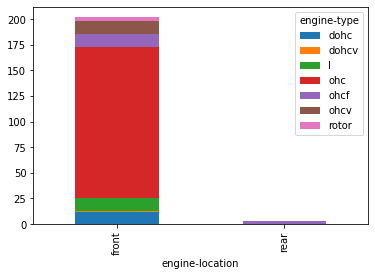

dof=6
p= 8.711843169176373e-07
probability=0.950,critcal=12.592,stat=38.564
significance= 0.050,p=0.000
H0:  engine-location  and  engine-type  Independent
Dependent: Reject H0
------------------- engine-location --- num-of-cylinders ----------------------
num-of-cylinders  eight  five  four  six  three  twelve  two
engine-location                                             
front                 5    11   159   21      1       1    4
rear                  0     0     0    3      0       0    0


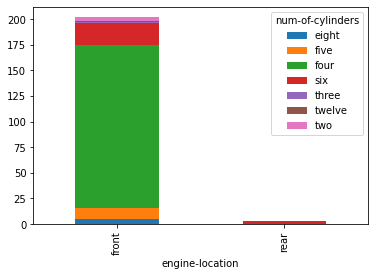

dof=6
p= 0.0008096414382534125
probability=0.950,critcal=12.592,stat=22.961
significance= 0.050,p=0.001
H0:  engine-location  and  num-of-cylinders  Independent
Dependent: Reject H0
------------------- engine-location --- fuel-system ----------------------
fuel-system      1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
engine-location                                              
front              11    66     3   20    1    91     9     1
rear                0     0     0    0    0     3     0     0


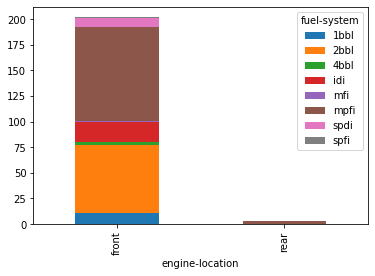

dof=7
p= 0.8250452998651658
probability=0.950,critcal=14.067,stat=3.595
significance= 0.050,p=0.825
H0:  engine-location  and  fuel-system  Independent
Indepent: Accept H0
------------------- engine-location --- symboling ----------------------
symboling        -2  -1   0   1   2   3
engine-location                        
front             3  22  67  54  32  24
rear              0   0   0   0   0   3


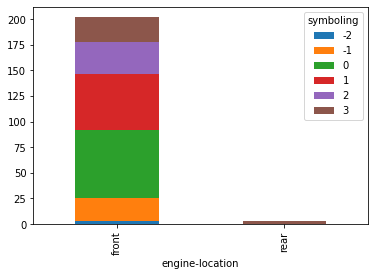

dof=5
p= 0.0012116980892061633
probability=0.950,critcal=11.070,stat=20.072
significance= 0.050,p=0.001
H0:  engine-location  and  symboling  Independent
Dependent: Reject H0
------------------- engine-type --- num-of-cylinders ----------------------
num-of-cylinders  eight  five  four  six  three  twelve  two
engine-type                                                 
dohc                  0     0     6    6      0       0    0
dohcv                 1     0     0    0      0       0    0
l                     0     0    11    0      1       0    0
ohc                   0    11   130    7      0       0    0
ohcf                  0     0    12    3      0       0    0
ohcv                  4     0     0    8      0       1    0
rotor                 0     0     0    0      0       0    4


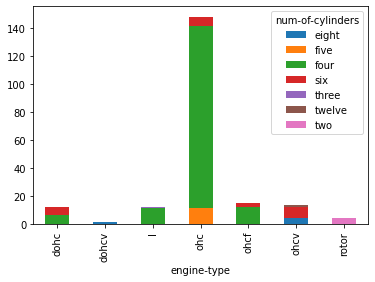

dof=36
p= 2.535375748012419e-61
probability=0.950,critcal=50.998,stat=391.651
significance= 0.050,p=0.000
H0:  engine-type  and  num-of-cylinders  Independent
Dependent: Reject H0
------------------- engine-type --- fuel-system ----------------------
fuel-system  1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
engine-type                                              
dohc            0     0     0    0    0    12     0     0
dohcv           0     0     0    0    0     1     0     0
l               0     1     0    5    0     6     0     0
ohc            11    57     0   15    1    54     9     1
ohcf            0     8     0    0    0     7     0     0
ohcv            0     0     0    0    0    13     0     0
rotor           0     0     3    0    0     1     0     0


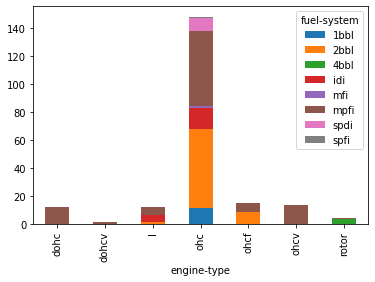

dof=42
p= 1.660731890909705e-24
probability=0.950,critcal=58.124,stat=211.740
significance= 0.050,p=0.000
H0:  engine-type  and  fuel-system  Independent
Dependent: Reject H0
------------------- engine-type --- symboling ----------------------
symboling    -2  -1   0   1   2   3
engine-type                        
dohc          0   2   2   2   1   5
dohcv         0   0   0   1   0   0
l             0   0  11   0   1   0
ohc           3  18  40  48  27  12
ohcf          0   0   9   0   3   3
ohcv          0   2   5   3   0   3
rotor         0   0   0   0   0   4


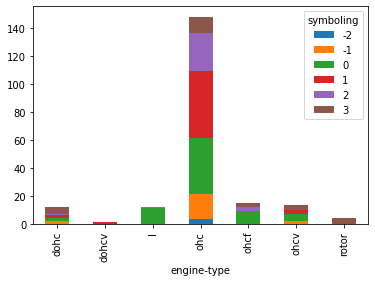

dof=30
p= 2.3098153521525766e-06
probability=0.950,critcal=43.773,stat=79.527
significance= 0.050,p=0.000
H0:  engine-type  and  symboling  Independent
Dependent: Reject H0
------------------- num-of-cylinders --- fuel-system ----------------------
fuel-system       1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
num-of-cylinders                                              
eight                0     0     0    0    0     5     0     0
five                 0     0     0    4    0     7     0     0
four                11    65     0   15    1    57     9     1
six                  0     0     0    1    0    23     0     0
three                0     1     0    0    0     0     0     0
twelve               0     0     0    0    0     1     0     0
two                  0     0     3    0    0     1     0     0


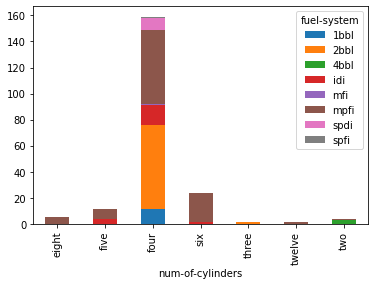

dof=42
p= 6.002218582462869e-24
probability=0.950,critcal=58.124,stat=208.575
significance= 0.050,p=0.000
H0:  num-of-cylinders  and  fuel-system  Independent
Dependent: Reject H0
------------------- num-of-cylinders --- symboling ----------------------
symboling         -2  -1   0   1   2   3
num-of-cylinders                        
eight              0   1   1   2   0   1
five               0   3   3   3   2   0
four               3  14  52  46  29  15
six                0   4  10   3   0   7
three              0   0   0   0   1   0
twelve             0   0   1   0   0   0
two                0   0   0   0   0   4


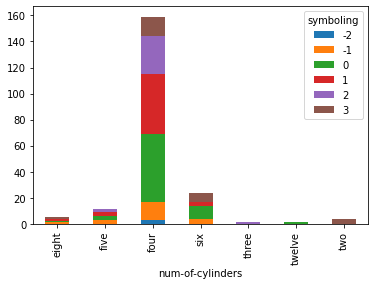

dof=30
p= 0.002836375289908036
probability=0.950,critcal=43.773,stat=55.856
significance= 0.050,p=0.003
H0:  num-of-cylinders  and  symboling  Independent
Dependent: Reject H0
------------------- fuel-system --- symboling ----------------------
symboling    -2  -1   0   1   2   3
fuel-system                        
1bbl          0   0   6   3   2   0
2bbl          0   2  21  34   8   1
4bbl          0   0   0   0   0   3
idi           0   5  11   1   3   0
mfi           0   0   0   0   0   1
mpfi          3  14  29  13  18  17
spdi          0   1   0   3   0   5
spfi          0   0   0   0   1   0


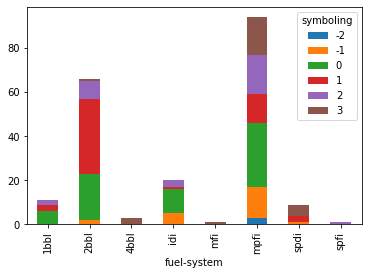

dof=35
p= 4.862419527300756e-09
probability=0.950,critcal=49.802,stat=105.805
significance= 0.050,p=0.000
H0:  fuel-system  and  symboling  Independent
Dependent: Reject H0


In [27]:
lst_categories1=[]
for i in lst_categories:
    for j in lst_categories:
        if (i!=j)and(j not in lst_categories1):
            phan_tich_hai_bien_cate_cate(i,j)
    lst_categories1.append(i)

In [28]:
lst_categories=['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system','symboling']

* Continuous - Categories 

In [29]:
# Xét 'price' có bị ảnh hưởng bởi 'symboling' và 'fuel-type' 

In [30]:
df_new= automobile[['symboling','fuel-type','price']]
df_new.head(5)

,symboling,fuel-type,price
0,3,gas,13495.0
1,3,gas,16500.0
2,1,gas,16500.0
3,2,gas,13950.0
4,2,gas,17450.0


In [31]:
df_new['fuel-type']=df_new['fuel-type'].apply(lambda x:1 if x=='gas' else '0')
df_new

,symboling,fuel-type,price
0,3,1,13495.0
1,3,1,16500.0
2,1,1,16500.0
3,2,1,13950.0
4,2,1,17450.0
...,...,...,...
200,-1,1,16845.0
201,-1,1,19045.0
202,-1,1,21485.0
203,-1,0,22470.0


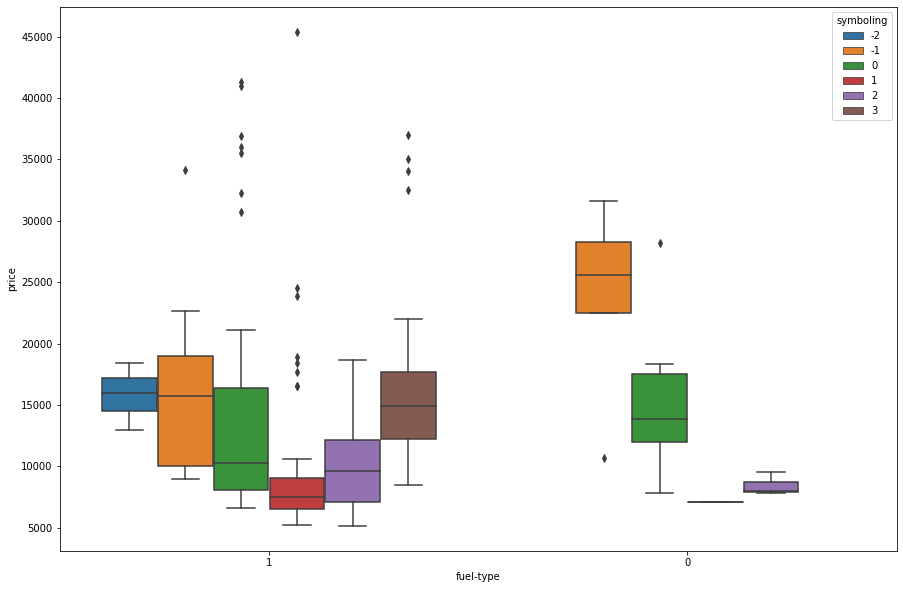

In [32]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_new,x='fuel-type',y='price',hue='symboling')
plt.show()

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
df_new.rename(columns={'fuel-type':'fueltype'},inplace=True)

In [35]:
model = ols("price ~ C(symboling) + C(fueltype)",data=df_new).fit()

In [36]:
anova_table=sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(symboling),1.793299e+09,5.0,6.512465,0.000013
C(fueltype),6.041452e+07,1.0,1.096993,0.296230
Residual,1.068413e+10,194.0,NaN,NaN


In [37]:
# Nhận xét: p_value(symboling)<0.05, p_value(fuel-type)>0.05 
# symboling có ảnh hưởng tới price, fuel-type ko ảnh hưởng tới price
automobile.drop('fuel-type',axis=1,inplace=True)

In [38]:
# Xét 'price' có bị ảnh hưởng bởi 'aspiration' và 'num-of-doors'

In [39]:
df_new= automobile[['aspiration','num-of-doors','price']]
df_new.head(5)

,aspiration,num-of-doors,price
0,std,two,13495.0
1,std,two,16500.0
2,std,two,16500.0
3,std,four,13950.0
4,std,four,17450.0


In [40]:
df_new['num-of-doors']=df_new['num-of-doors'].apply(lambda x:2 if x=='two' else '4')
df_new.head(5)

,aspiration,num-of-doors,price
0,std,2,13495.0
1,std,2,16500.0
2,std,2,16500.0
3,std,4,13950.0
4,std,4,17450.0


In [41]:
df_new['aspiration']=df_new['aspiration'].apply(lambda x:1 if x=='std' else '0')
df_new.head(5)

,aspiration,num-of-doors,price
0,1,2,13495.0
1,1,2,16500.0
2,1,2,16500.0
3,1,4,13950.0
4,1,4,17450.0


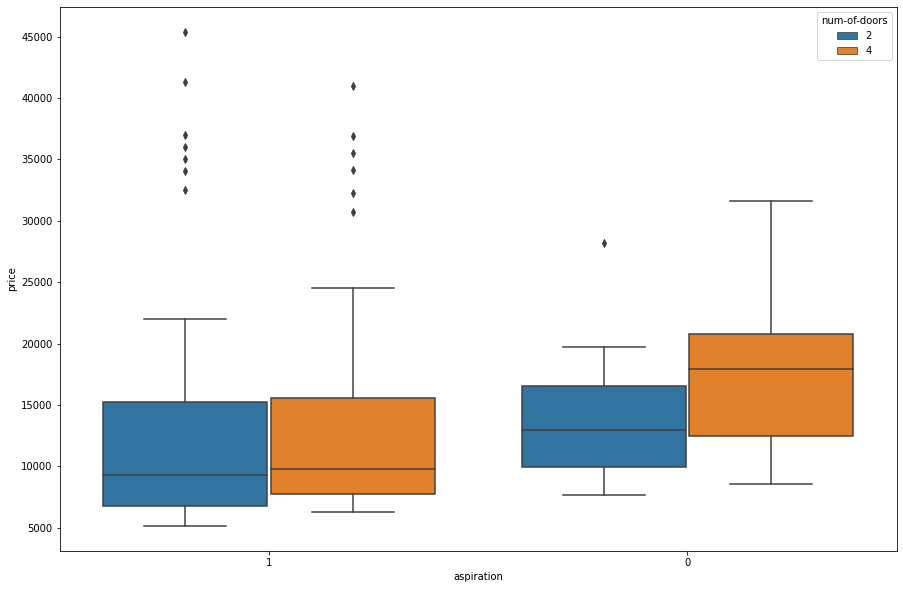

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_new,x='aspiration',y='price',hue='num-of-doors')
plt.show()

In [43]:
df_new.rename(columns={'num-of-doors':'numofdoors'},inplace=True)

In [44]:
model = ols("price ~ C(numofdoors) + C(aspiration)",data=df_new).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(numofdoors),1.228062e+07,1.0,0.199120,0.655920
C(aspiration),3.968704e+08,1.0,6.434916,0.011961
Residual,1.221156e+10,198.0,NaN,NaN


In [45]:
# Nhận xét: p_value(aspiration)<0.05, p_value(num-of-doors)>0.05 
# aspiration có ảnh hưởng tới price, num-of-doors ko ảnh hưởng tới price
automobile.drop('num-of-doors',axis=1,inplace=True)

In [46]:
# Xét 'price' có bị ảnh hưởng bởi 'engine-type' và 'fuel-system'

In [47]:
df_new=automobile[['engine-type','fuel-system','price']]

In [48]:
df_new['engine-type'].replace({'dohc':2, 'ohcv':3, 'ohc':4, 'l':1, 'rotor':5, 'ohcf':6, 'dohcv':7},inplace=True)
df_new['fuel-system'].replace({'mpfi':1, '2bbl':2, 'mfi':3, '1bbl':4, 'spfi':5, '4bbl':6, 'idi':7, 'spdi':8},inplace=True)

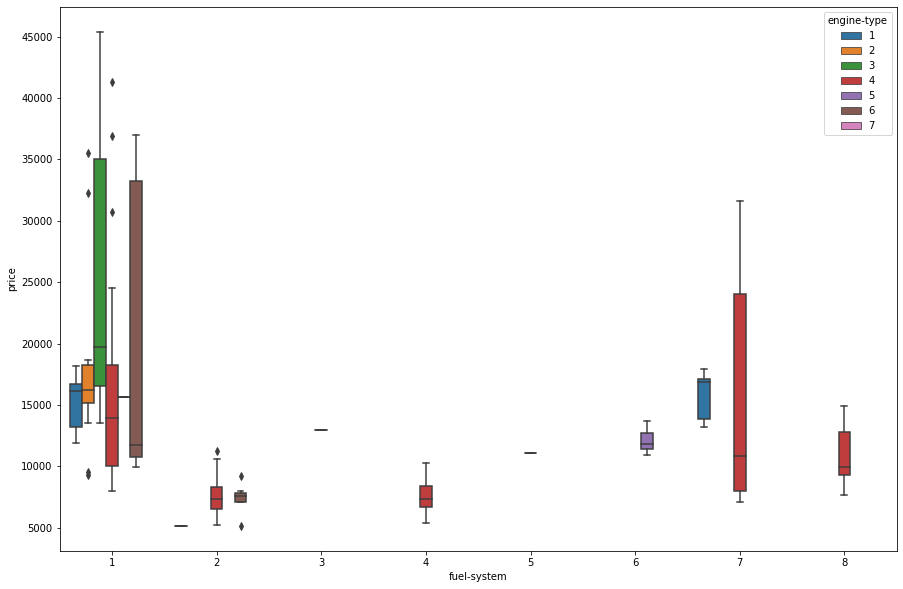

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_new,x='fuel-system',y='price',hue='engine-type')
plt.show()

In [50]:
df_new.rename(columns={'fuel-system':'fuelsystem'},inplace=True)
df_new.rename(columns={'engine-type':'enginetype'},inplace=True)

In [51]:
model = ols("price ~ C(fuelsystem) + C(enginetype)",data=df_new).fit()

In [52]:
anova_table=sm.stats.anova_lm(model, typ=2)
anova_table

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(fuelsystem),2.893627e+09,7.0,10.806244,1.992487e-11
C(enginetype),1.181115e+09,6.0,5.146017,1.896938e-04
Residual,7.191635e+09,188.0,NaN,NaN


In [53]:
# Nhận xét: p_value(engine-type)<0.05, p_value(fuel-system)<0.05 
# engine-type có ảnh hưởng tới price, fuel-system có ảnh hưởng tới price

In [54]:
# Xét 'price' có bị ảnh hưởng bởi 'body-style' và 'drive-wheel'

In [55]:
df_new=automobile[['body-style','drive-wheels','price']]

In [56]:
df_new['body-style'].replace({'convertible':1, 'hatchback':2, 'sedan':3, 'wagon':4, 'hardtop':5},inplace=True)
df_new['drive-wheels'].replace({'rwd':1, 'fwd':2, '4wd':3},inplace=True)

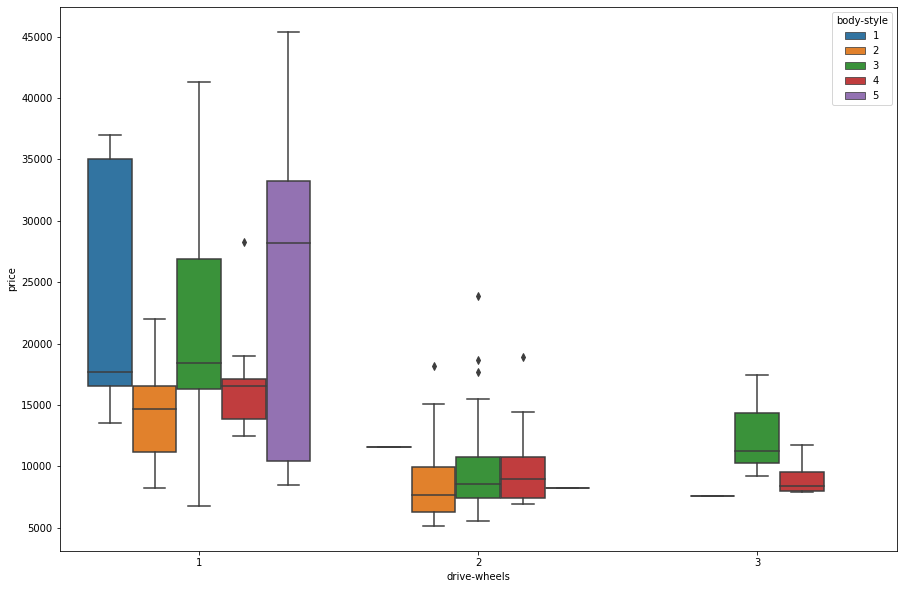

In [57]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_new,x='drive-wheels',y='price',hue='body-style')
plt.show()

In [58]:
df_new.rename(columns={'body-style':'bodystyle'},inplace=True)
df_new.rename(columns={'drive-wheels':'drivewheels'},inplace=True)

In [59]:
model = ols("price ~ C(bodystyle) + C(drivewheels)",data=df_new).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(bodystyle),6.843487e+08,4.0,4.876963,9.070294e-04
C(drivewheels),3.841875e+09,2.0,54.757701,1.397129e-19
Residual,6.805652e+09,194.0,NaN,NaN


In [60]:
# Nhận xét: p_value(drive-wheels)<0.05, p_value(body-style)>0.05 
# drive-wheels có ảnh hưởng tới price, body-style ko ảnh hưởng tới price
automobile.drop('body-style',axis=1,inplace=True)

## Xử lý giá trị thiếu

In [61]:
automobile.head(10)

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111.0,21,27,13495.0
1,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111.0,21,27,16500.0
2,1,alfa-romero,std,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154.0,19,26,16500.0
3,2,audi,std,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102.0,24,30,13950.0
4,2,audi,std,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115.0,18,22,17450.0
5,2,audi,std,fwd,front,99.8,177.3,66.3,2507,ohc,five,136,mpfi,3.19,110.0,19,25,15250.0
6,1,audi,std,fwd,front,105.8,192.7,71.4,2844,ohc,five,136,mpfi,3.19,110.0,19,25,17710.0
7,1,audi,std,fwd,front,105.8,192.7,71.4,2954,ohc,five,136,mpfi,3.19,110.0,19,25,18920.0
8,1,audi,turbo,fwd,front,105.8,192.7,71.4,3086,ohc,five,131,mpfi,3.13,140.0,17,20,23875.0
9,0,audi,turbo,4wd,front,99.5,178.2,67.9,3053,ohc,five,131,mpfi,3.13,160.0,16,22,NaN


In [62]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   aspiration        205 non-null    object 
 3   drive-wheels      205 non-null    object 
 4   engine-location   205 non-null    object 
 5   wheel-base        205 non-null    float64
 6   length            205 non-null    float64
 7   width             205 non-null    float64
 8   curb-weight       205 non-null    int64  
 9   engine-type       205 non-null    object 
 10  num-of-cylinders  205 non-null    object 
 11  engine-size       205 non-null    int64  
 12  fuel-system       205 non-null    object 
 13  bore              201 non-null    float64
 14  horsepower        203 non-null    float64
 15  city-mpg          205 non-null    int64  
 16  highway-mpg       205 non-null    int64  
 1

In [63]:
automobile.isnull().sum()

symboling           0
make                0
aspiration          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                4
horsepower          2
city-mpg            0
highway-mpg         0
price               4
dtype: int64

In [64]:
bore_mean=automobile.loc[(automobile['bore'].isnull())==False,'bore'].mean().astype(float)

In [65]:
automobile['bore'].fillna(bore_mean,inplace=True)

In [66]:
horse_mean=automobile.loc[(automobile['horsepower'].isnull())==False,'horsepower'].mean().astype(int)
automobile['horsepower'].fillna(horse_mean,inplace=True)
automobile['horsepower']=automobile['horsepower'].astype(int)

In [67]:
price_mean=automobile.loc[(automobile['price'].isnull())==False,'price'].mean().astype(int)
automobile['price'].fillna(price_mean,inplace=True)
automobile['price']=automobile['price'].astype(int)

In [68]:
automobile.isnull().sum()

symboling           0
make                0
aspiration          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                0
horsepower          0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [69]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   aspiration        205 non-null    object 
 3   drive-wheels      205 non-null    object 
 4   engine-location   205 non-null    object 
 5   wheel-base        205 non-null    float64
 6   length            205 non-null    float64
 7   width             205 non-null    float64
 8   curb-weight       205 non-null    int64  
 9   engine-type       205 non-null    object 
 10  num-of-cylinders  205 non-null    object 
 11  engine-size       205 non-null    int64  
 12  fuel-system       205 non-null    object 
 13  bore              205 non-null    float64
 14  horsepower        205 non-null    int32  
 15  city-mpg          205 non-null    int64  
 16  highway-mpg       205 non-null    int64  
 1

## Xử lý ngoại lệ

In [70]:
# XỬ lý cột wheel-base
IQR=scipy.stats.iqr(automobile['wheel-base'])
Upper_cut_off=np.percentile(automobile['wheel-base'],75)+1.5*IQR
Lower_cut_off=np.percentile(automobile['wheel-base'],25)-1.5*IQR
n_Outliers=automobile[(automobile['wheel-base']>Upper_cut_off)|(automobile['wheel-base']<Lower_cut_off)]['wheel-base']
n_Outliers

70    115.6
71    115.6
73    120.9
Name: wheel-base, dtype: float64

In [71]:
automobile=automobile[(automobile['wheel-base']<Upper_cut_off)&(automobile['wheel-base']>Lower_cut_off)]
automobile

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495
1,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500
2,1,alfa-romero,std,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500
3,2,audi,std,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950
4,2,audi,std,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,std,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845
201,-1,volvo,turbo,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045
202,-1,volvo,std,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485
203,-1,volvo,turbo,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470


In [72]:
# XỬ lý cột length
IQR=scipy.stats.iqr(automobile['length'])
Upper_cut_off=np.percentile(automobile['length'],75)+1.5*IQR
Lower_cut_off=np.percentile(automobile['length'],25)-1.5*IQR
n_Outliers=automobile[(automobile['length']>Upper_cut_off)|(automobile['length']<Lower_cut_off)]['length']
n_Outliers

18    141.1
Name: length, dtype: float64

In [73]:
automobile=automobile[(automobile['length']<Upper_cut_off)&(automobile['length']>Lower_cut_off)]

In [74]:
automobile

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495
1,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500
2,1,alfa-romero,std,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500
3,2,audi,std,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950
4,2,audi,std,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,std,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845
201,-1,volvo,turbo,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045
202,-1,volvo,std,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485
203,-1,volvo,turbo,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470


In [75]:
# Xử lý cột width
IQR=scipy.stats.iqr(automobile['width'])
Upper_cut_off=np.percentile(automobile['width'],75)+1.5*IQR
Lower_cut_off=np.percentile(automobile['width'],25)-1.5*IQR
n_Outliers=automobile[(automobile['width']>Upper_cut_off)|(automobile['width']<Lower_cut_off)]['width']
n_Outliers

6      71.4
7      71.4
8      71.4
17     70.9
49     70.6
67     70.3
68     70.3
69     70.3
72     70.5
74     72.0
129    72.3
Name: width, dtype: float64

In [76]:
width_med=automobile['width'].median()
width_med

65.5

In [77]:
automobile['width'].replace(n_Outliers.values,value=width_med,inplace=True)

In [78]:
automobile.head(10)

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495
1,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500
2,1,alfa-romero,std,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500
3,2,audi,std,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950
4,2,audi,std,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450
5,2,audi,std,fwd,front,99.8,177.3,66.3,2507,ohc,five,136,mpfi,3.19,110,19,25,15250
6,1,audi,std,fwd,front,105.8,192.7,65.5,2844,ohc,five,136,mpfi,3.19,110,19,25,17710
7,1,audi,std,fwd,front,105.8,192.7,65.5,2954,ohc,five,136,mpfi,3.19,110,19,25,18920
8,1,audi,turbo,fwd,front,105.8,192.7,65.5,3086,ohc,five,131,mpfi,3.13,140,17,20,23875
9,0,audi,turbo,4wd,front,99.5,178.2,67.9,3053,ohc,five,131,mpfi,3.13,160,16,22,13207


In [79]:
# Xử lý cột engine-size
IQR=scipy.stats.iqr(automobile['engine-size'])
Upper_cut_off=np.percentile(automobile['engine-size'],75)+1.5*IQR
Lower_cut_off=np.percentile(automobile['engine-size'],25)-1.5*IQR
n_Outliers=automobile[(automobile['engine-size']>Upper_cut_off)|(automobile['engine-size']<Lower_cut_off)]['engine-size']
n_Outliers

15    209
16    209
17    209
47    258
48    258
49    326
72    234
74    304
Name: engine-size, dtype: int64

In [80]:
eng_med=automobile['engine-size'].median()
eng_med

119.0

In [81]:
automobile['engine-size'].replace(n_Outliers.values,value=eng_med,inplace=True)
automobile.head(20)

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495
1,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500
2,1,alfa-romero,std,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500
3,2,audi,std,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950
4,2,audi,std,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450
5,2,audi,std,fwd,front,99.8,177.3,66.3,2507,ohc,five,136,mpfi,3.19,110,19,25,15250
6,1,audi,std,fwd,front,105.8,192.7,65.5,2844,ohc,five,136,mpfi,3.19,110,19,25,17710
7,1,audi,std,fwd,front,105.8,192.7,65.5,2954,ohc,five,136,mpfi,3.19,110,19,25,18920
8,1,audi,turbo,fwd,front,105.8,192.7,65.5,3086,ohc,five,131,mpfi,3.13,140,17,20,23875
9,0,audi,turbo,4wd,front,99.5,178.2,67.9,3053,ohc,five,131,mpfi,3.13,160,16,22,13207


In [82]:
# Xử lý cột horsepower
IQR=scipy.stats.iqr(automobile['horsepower'])
Upper_cut_off=np.percentile(automobile['horsepower'],75)+1.5*IQR
Lower_cut_off=np.percentile(automobile['horsepower'],25)-1.5*IQR
n_Outliers=automobile[(automobile['horsepower']>Upper_cut_off)|(automobile['horsepower']<Lower_cut_off)]['horsepower']
n_Outliers

49     262
105    200
126    207
127    207
128    207
129    288
Name: horsepower, dtype: int32

In [83]:
hor_med=automobile['horsepower'].median()
hor_med

95.0

In [84]:
automobile['horsepower'].replace(n_Outliers.values,value=hor_med,inplace=True)
automobile.head(20)

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495
1,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500
2,1,alfa-romero,std,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500
3,2,audi,std,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950
4,2,audi,std,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450
5,2,audi,std,fwd,front,99.8,177.3,66.3,2507,ohc,five,136,mpfi,3.19,110,19,25,15250
6,1,audi,std,fwd,front,105.8,192.7,65.5,2844,ohc,five,136,mpfi,3.19,110,19,25,17710
7,1,audi,std,fwd,front,105.8,192.7,65.5,2954,ohc,five,136,mpfi,3.19,110,19,25,18920
8,1,audi,turbo,fwd,front,105.8,192.7,65.5,3086,ohc,five,131,mpfi,3.13,140,17,20,23875
9,0,audi,turbo,4wd,front,99.5,178.2,67.9,3053,ohc,five,131,mpfi,3.13,160,16,22,13207


In [85]:
# Xử lý cột city-mpg
IQR=scipy.stats.iqr(automobile['city-mpg'])
Upper_cut_off=np.percentile(automobile['city-mpg'],75)+1.5*IQR
Lower_cut_off=np.percentile(automobile['city-mpg'],25)-1.5*IQR
n_Outliers=automobile[(automobile['city-mpg']>Upper_cut_off)|(automobile['city-mpg']<Lower_cut_off)]['city-mpg']
n_Outliers

30    49
Name: city-mpg, dtype: int64

In [86]:
automobile=automobile[(automobile['city-mpg']<Upper_cut_off)&(automobile['city-mpg']>Lower_cut_off)]

In [87]:
automobile

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495
1,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500
2,1,alfa-romero,std,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500
3,2,audi,std,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950
4,2,audi,std,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,std,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845
201,-1,volvo,turbo,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045
202,-1,volvo,std,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485
203,-1,volvo,turbo,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470


In [88]:
# Xử lý cột highway-mpg
IQR=scipy.stats.iqr(automobile['highway-mpg'])
Upper_cut_off=np.percentile(automobile['highway-mpg'],75)+1.5*IQR
Lower_cut_off=np.percentile(automobile['highway-mpg'],25)-1.5*IQR
n_Outliers=automobile[(automobile['highway-mpg']>Upper_cut_off)|(automobile['highway-mpg']<Lower_cut_off)]['highway-mpg']
n_Outliers

90    50
Name: highway-mpg, dtype: int64

In [89]:
automobile=automobile[(automobile['highway-mpg']<Upper_cut_off)&(automobile['highway-mpg']>Lower_cut_off)]
automobile

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495
1,3,alfa-romero,std,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500
2,1,alfa-romero,std,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500
3,2,audi,std,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950
4,2,audi,std,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,std,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845
201,-1,volvo,turbo,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045
202,-1,volvo,std,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485
203,-1,volvo,turbo,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470


In [90]:
# kiểm tra có giá trị duplicate ko 
automobile.duplicated().any()

False

In [91]:
# => ko có giá trị trùng lặp

In [92]:
# Đổi kiểu dữ liệu thành category
lst_category1=['symboling','aspiration','drive-wheels','engine-location','engine-type','fuel-system','num-of-cylinders']
for col in lst_category1:
    automobile[col]=automobile[col].astype('category')

In [93]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         199 non-null    category
 1   make              199 non-null    object  
 2   aspiration        199 non-null    category
 3   drive-wheels      199 non-null    category
 4   engine-location   199 non-null    category
 5   wheel-base        199 non-null    float64 
 6   length            199 non-null    float64 
 7   width             199 non-null    float64 
 8   curb-weight       199 non-null    int64   
 9   engine-type       199 non-null    category
 10  num-of-cylinders  199 non-null    category
 11  engine-size       199 non-null    int64   
 12  fuel-system       199 non-null    category
 13  bore              199 non-null    float64 
 14  horsepower        199 non-null    int32   
 15  city-mpg          199 non-null    int64   
 16  highway-mpg       199 non-

### Chuẩn hóa dữ liệu

### Chuẩn hóa Log

In [94]:
df_new=automobile[['wheel-base','length','width','curb-weight','bore','horsepower','city-mpg','highway-mpg']]

In [95]:
df_new.skew()

wheel-base     0.950162
length         0.143967
width          0.478313
curb-weight    0.693481
bore           0.020218
horsepower     0.850690
city-mpg       0.303542
highway-mpg    0.288447
dtype: float64

In [96]:
# Tất cả thuộc tính cont đều lệch phải

In [97]:
df_new.var()

wheel-base         30.617514
length            132.471501
width               2.434658
curb-weight    244811.511497
bore                0.071695
horsepower       1007.123344
city-mpg           35.706969
highway-mpg        39.646617
dtype: float64

In [98]:
# Những thuộc tính có variance cao cần chuẩn hóa log là:
# wheel-base,length,curb-weight,horsepower,city-mpg,highway-mpg
df_new1=automobile[['wheel-base','length','curb-weight','horsepower','city-mpg','highway-mpg']]

In [99]:
for col in df_new1.columns:
    print(col,': min:',df_new1[col].min(),',max:',df_new1[col].max())

wheel-base : min: 86.6 ,max: 114.2
length : min: 144.6 ,max: 199.6
curb-weight : min: 1819 ,max: 4066
horsepower : min: 52 ,max: 184
city-mpg : min: 13 ,max: 38
highway-mpg : min: 16 ,max: 47


In [100]:
# tất cả thuôc tính cont đều nằm trong không gian dương 
# => có thể áp dụng chuẩn hóa log
for col in df_new1.columns:
    automobile[col]=np.log(automobile[col])

In [101]:
automobile[['wheel-base','length','curb-weight','horsepower','city-mpg','highway-mpg']].var()

wheel-base     0.003009
length         0.004377
curb-weight    0.035393
horsepower     0.091208
city-mpg       0.058993
highway-mpg    0.043659
dtype: float64

In [102]:
lst_continuous1=['wheel-base','length','width','curb-weight','bore','horsepower','city-mpg','highway-mpg']

-------------------------- wheel-base ---------------------------------
range: 0.2766514816535208
variance: 0.0030090000869428717
skew: 0.818199179839146
=> Phân phối lẹch phải
kur: 0.30982260686746566
=> Phân phối nhọn
IQR: 0.07243595056912078


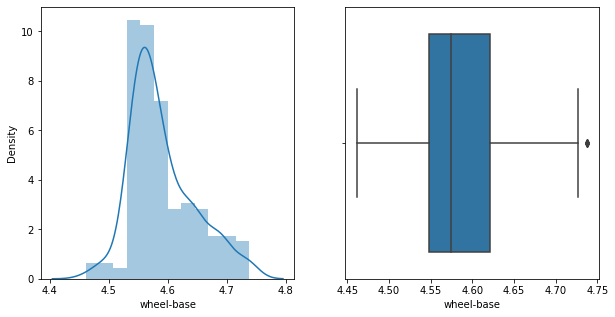

Số Outliers có trong cột  wheel-base  là:  4
-------------------------- length ---------------------------------
range: 0.3223440541526994
variance: 0.004377368920184788
skew: -0.015790617698097722
=> phân phối lệch trái
kur: -0.3585587382414399
=> phân phối bẹt
IQR: 0.08501082462886878


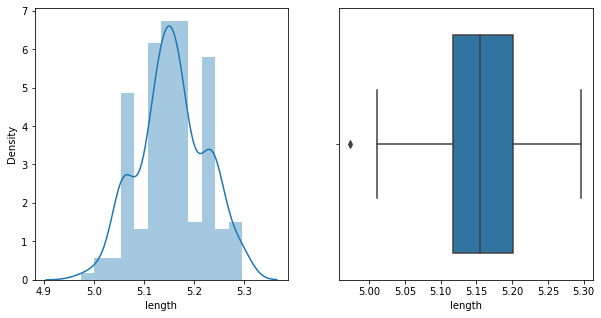

Số Outliers có trong cột  length  là:  1
-------------------------- width ---------------------------------
range: 7.799999999999997
variance: 2.434657631592308
skew: 0.47831308420598334
=> Phân phối lẹch phải
kur: -0.39373988598594645
=> phân phối bẹt
IQR: 2.3499999999999943


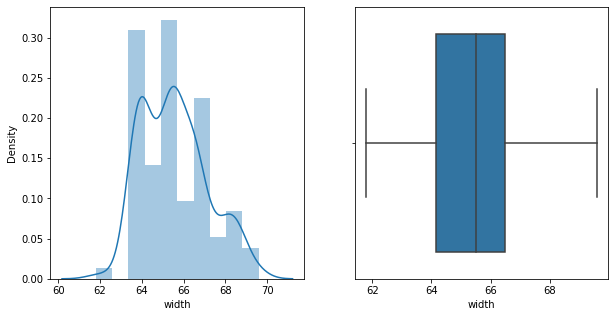

Số Outliers có trong cột  width  là:  0
-------------------------- curb-weight ---------------------------------
range: 0.8043728156701704
variance: 0.035392603967610604
skew: 0.32550392098823955
=> Phân phối lẹch phải
kur: -0.6740800173119181
=> phân phối bẹt
IQR: 0.2936972751651945


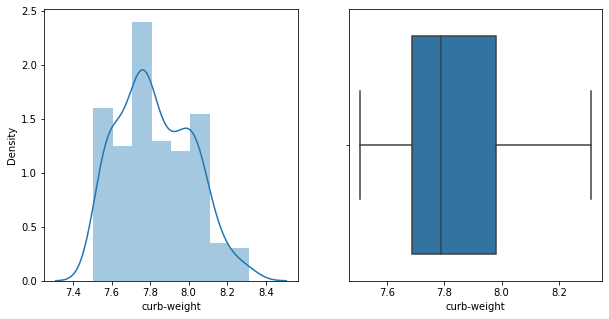

Số Outliers có trong cột  curb-weight  là:  0
-------------------------- bore ---------------------------------
range: 1.4
variance: 0.07169499531699058
skew: 0.020217695718518766
=> Phân phối lẹch phải
kur: -0.7375293425461593
=> phân phối bẹt
IQR: 0.43500000000000005


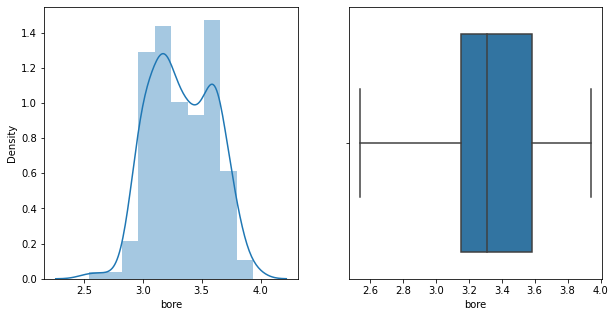

Số Outliers có trong cột  bore  là:  0
-------------------------- horsepower ---------------------------------
range: 1.2636920390275583
variance: 0.09120751044101612
skew: 0.3150490202605604
=> Phân phối lẹch phải
kur: -0.7133605132623515
=> phân phối bẹt
IQR: 0.500765917685448


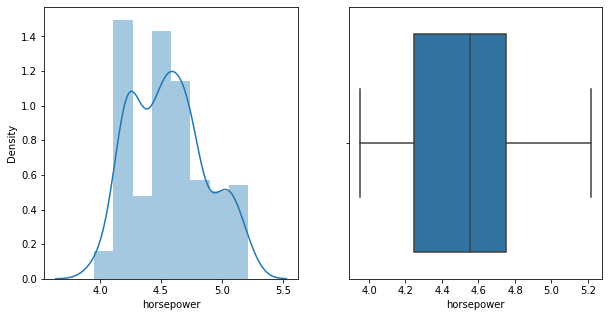

Số Outliers có trong cột  horsepower  là:  0
-------------------------- city-mpg ---------------------------------
range: 1.072636802264849
variance: 0.05899319516313934
skew: -0.15487034713552855
=> phân phối lệch trái
kur: -0.7097367641894761
=> phân phối bẹt
IQR: 0.4567584024957152


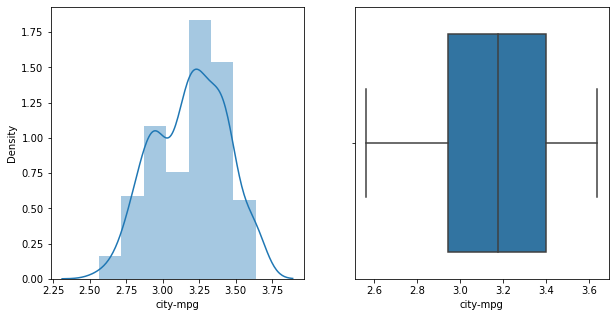

Số Outliers có trong cột  city-mpg  là:  0
-------------------------- highway-mpg ---------------------------------
range: 1.0775588794702773
variance: 0.04365912227156212
skew: -0.2051974316764446
=> phân phối lệch trái
kur: -0.2702814052717195
=> phân phối bẹt
IQR: 0.307484699747961


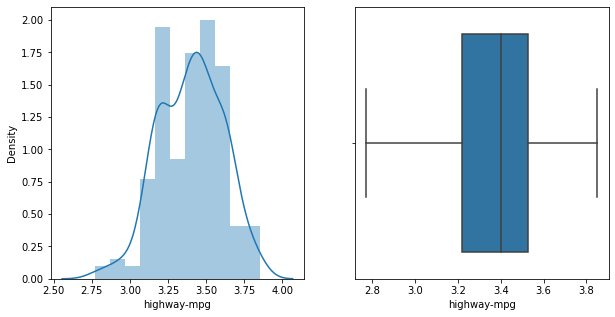

Số Outliers có trong cột  highway-mpg  là:  0


In [103]:
# kiểm tra các thuộc tính có đủ điều kiến để áp dụng feature scailing ko
for col in lst_continuous1:
    print('--------------------------',col,'---------------------------------')
    print('range:',np.ptp(automobile[col]))
    print('variance:',automobile[col].var())
    print('skew:',automobile[col].skew())
    if automobile[col].skew() >0:
        print('=> Phân phối lẹch phải')
    elif automobile[col].skew() == 0:
        print('=> phân phối chuẩn')
    else:
        print('=> phân phối lệch trái')
    print('kur:',automobile[col].kurtosis())
    if automobile[col].kurtosis() >0:
        print('=> Phân phối nhọn')
    elif automobile[col].kurtosis() == 0:
        print('=> phân phối chuẩn')
    else:
        print('=> phân phối bẹt')
    print('IQR:',scipy.stats.iqr(automobile[col]))
    Outliers_Upper=automobile[automobile[col] > np.percentile(automobile[col],75)+1.5*scipy.stats.iqr(automobile[col])]
    Outliers_Lower=automobile[automobile[col] < np.percentile(automobile[col],25)-1.5*scipy.stats.iqr(automobile[col])]
    plt.subplots(1,2,figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(automobile[col])
    plt.subplot(1,2,2)
    sns.boxplot(automobile[col])
    plt.show()
    print('Số Outliers có trong cột ',col,' là: ',Outliers_Upper.shape[0]+Outliers_Lower.shape[0])

### Chuẩn hóa Robust Scaler

In [104]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_scale=scaler.fit_transform(automobile[['wheel-base','length','width','curb-weight','bore','horsepower','city-mpg','highway-mpg']])
df_scale

array([[-1.2504719 , -0.30269573, -0.59574468, ...,  0.31083048,
        -0.29234578, -0.34265287],
       [-1.2504719 , -0.30269573, -0.59574468, ...,  0.31083048,
        -0.29234578, -0.34265287],
       [-0.36047217, -0.13662416,  0.        , ...,  0.9646737 ,
        -0.51146262, -0.46539175],
       ...,
       [ 1.62286701,  1.01447384,  1.44680851, ...,  0.68687364,
        -0.62983422, -0.86411833],
       [ 1.62286701,  1.01447384,  1.44680851, ...,  0.21878926,
         0.1752408 , -0.34265287],
       [ 1.62286701,  1.01447384,  1.44680851, ...,  0.36408539,
        -0.51146262, -0.59294513]])

In [105]:
df_scale=pd.DataFrame(df_scale,columns=['wheel-base','length','width','curb-weight','bore','horsepower','city-mpg','highway-mpg'])
df_scale

,wheel-base,length,width,curb-weight,bore,horsepower,city-mpg,highway-mpg
0,-1.250472,-0.302696,-0.595745,0.183943,0.367816,0.310830,-0.292346,-0.342653
1,-1.250472,-0.302696,-0.595745,0.183943,0.367816,0.310830,-0.292346,-0.342653
2,-0.360472,-0.136624,0.000000,0.532913,-1.448276,0.964674,-0.511463,-0.465392
3,0.392860,0.228680,0.297872,-0.110376,-0.275862,0.141974,0.000000,0.000000
4,0.337417,0.228680,0.382979,0.534119,-0.275862,0.381526,-0.629834,-1.008684
...,...,...,...,...,...,...,...,...
194,1.622867,1.014474,1.446809,0.685052,1.080460,0.364085,-0.093178,-0.224378
195,1.622867,1.014474,1.404255,0.795134,1.080460,1.040999,-0.511463,-0.592945
196,1.622867,1.014474,1.446809,0.753562,0.620690,0.686874,-0.629834,-0.864118
197,1.622867,1.014474,1.446809,0.977755,-0.689655,0.218789,0.175241,-0.342653


In [106]:
automobile.reset_index(drop=True,inplace=True)

In [107]:
automobile[['wheel-base','length','width','curb-weight','bore','horsepower','city-mpg','highway-mpg']]=df_scale
automobile

,symboling,make,aspiration,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,std,rwd,front,-1.250472,-0.302696,-0.595745,0.183943,dohc,four,130,mpfi,0.367816,0.310830,-0.292346,-0.342653,13495
1,3,alfa-romero,std,rwd,front,-1.250472,-0.302696,-0.595745,0.183943,dohc,four,130,mpfi,0.367816,0.310830,-0.292346,-0.342653,16500
2,1,alfa-romero,std,rwd,front,-0.360472,-0.136624,0.000000,0.532913,ohcv,six,152,mpfi,-1.448276,0.964674,-0.511463,-0.465392,16500
3,2,audi,std,fwd,front,0.392860,0.228680,0.297872,-0.110376,ohc,four,109,mpfi,-0.275862,0.141974,0.000000,0.000000,13950
4,2,audi,std,4wd,front,0.337417,0.228680,0.382979,0.534119,ohc,five,136,mpfi,-0.275862,0.381526,-0.629834,-1.008684,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,volvo,std,rwd,front,1.622867,1.014474,1.446809,0.685052,ohc,four,141,mpfi,1.080460,0.364085,-0.093178,-0.224378,16845
195,-1,volvo,turbo,rwd,front,1.622867,1.014474,1.404255,0.795134,ohc,four,141,mpfi,1.080460,1.040999,-0.511463,-0.592945,19045
196,-1,volvo,std,rwd,front,1.622867,1.014474,1.446809,0.753562,ohcv,six,173,mpfi,0.620690,0.686874,-0.629834,-0.864118,21485
197,-1,volvo,turbo,rwd,front,1.622867,1.014474,1.446809,0.977755,ohc,six,145,idi,-0.689655,0.218789,0.175241,-0.342653,22470


### Feature engineering

In [108]:
for col in lst_category1:
    print(col,':',automobile[col].unique())

symboling : [3, 1, 2, 0, -1, -2]
Categories (6, int64): [3, 1, 2, 0, -1, -2]
aspiration : ['std', 'turbo']
Categories (2, object): ['std', 'turbo']
drive-wheels : ['rwd', 'fwd', '4wd']
Categories (3, object): ['rwd', 'fwd', '4wd']
engine-location : ['front', 'rear']
Categories (2, object): ['front', 'rear']
engine-type : ['dohc', 'ohcv', 'ohc', 'rotor', 'l', 'ohcf', 'dohcv']
Categories (7, object): ['dohc', 'ohcv', 'ohc', 'rotor', 'l', 'ohcf', 'dohcv']
fuel-system : ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
Categories (8, object): ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
num-of-cylinders : ['four', 'six', 'five', 'twelve', 'two', 'eight']
Categories (6, object): ['four', 'six', 'five', 'twelve', 'two', 'eight']


In [109]:
automobile['num-of-cylinders']=automobile['num-of-cylinders'].replace({'eight':8,'four':4,'six':6,'five':5,'twelve':12,'two':2})

#### Label Encoder

In [110]:
# cột aspiration và engine-location chỉ có 2 giá trị
# có thể áp dụng label encoder

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
encoder=LabelEncoder()

In [113]:
automobile['aspiration_encoder']=encoder.fit_transform(automobile['aspiration'])

In [114]:
automobile=automobile.drop('aspiration',axis=1)

In [115]:
automobile['engine-location_encoder']=encoder.fit_transform(automobile['engine-location'])

In [116]:
automobile=automobile.drop('engine-location',axis=1)

In [117]:
automobile['num-of-cylinders_encoder']=encoder.fit_transform(automobile['num-of-cylinders'])

In [118]:
automobile=automobile.drop('num-of-cylinders',axis=1)

In [119]:
automobile

,symboling,make,drive-wheels,wheel-base,length,width,curb-weight,engine-type,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price,aspiration_encoder,engine-location_encoder,num-of-cylinders_encoder
0,3,alfa-romero,rwd,-1.250472,-0.302696,-0.595745,0.183943,dohc,130,mpfi,0.367816,0.310830,-0.292346,-0.342653,13495,0,0,1
1,3,alfa-romero,rwd,-1.250472,-0.302696,-0.595745,0.183943,dohc,130,mpfi,0.367816,0.310830,-0.292346,-0.342653,16500,0,0,1
2,1,alfa-romero,rwd,-0.360472,-0.136624,0.000000,0.532913,ohcv,152,mpfi,-1.448276,0.964674,-0.511463,-0.465392,16500,0,0,3
3,2,audi,fwd,0.392860,0.228680,0.297872,-0.110376,ohc,109,mpfi,-0.275862,0.141974,0.000000,0.000000,13950,0,0,1
4,2,audi,4wd,0.337417,0.228680,0.382979,0.534119,ohc,136,mpfi,-0.275862,0.381526,-0.629834,-1.008684,17450,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,volvo,rwd,1.622867,1.014474,1.446809,0.685052,ohc,141,mpfi,1.080460,0.364085,-0.093178,-0.224378,16845,0,0,1
195,-1,volvo,rwd,1.622867,1.014474,1.404255,0.795134,ohc,141,mpfi,1.080460,1.040999,-0.511463,-0.592945,19045,1,0,1
196,-1,volvo,rwd,1.622867,1.014474,1.446809,0.753562,ohcv,173,mpfi,0.620690,0.686874,-0.629834,-0.864118,21485,0,0,3
197,-1,volvo,rwd,1.622867,1.014474,1.446809,0.977755,ohc,145,idi,-0.689655,0.218789,0.175241,-0.342653,22470,1,0,3


#### OneHot Encoder

In [120]:
from sklearn.preprocessing import OneHotEncoder

In [121]:
lst_category1=['drive-wheels','body-style','engine-type','engine-size','fuel-system']

In [122]:
encoder=OneHotEncoder()

In [123]:
# Xử lý cột drive-wheels

In [124]:
df_encode=encoder.fit_transform(automobile[['drive-wheels']]).toarray()
df_encode=pd.DataFrame(df_encode,columns=['D_' + i for i in encoder.categories_[0]])
automobile=pd.concat([automobile,df_encode],axis=1)

In [125]:
automobile=automobile.drop('drive-wheels',axis=1)

In [126]:
# Xử lý cột engine-type
df_encode2=encoder.fit_transform(automobile[['engine-type']]).toarray()
df_encode2=pd.DataFrame(df_encode2,columns=['ET_' + i for i in encoder.categories_[0]])
automobile=pd.concat([automobile,df_encode2],axis=1)

In [127]:
automobile=automobile.drop('engine-type',axis=1)

In [128]:
# Xử lý cột fuel-system
df_encode3=encoder.fit_transform(automobile[['fuel-system']]).toarray()
df_encode3=pd.DataFrame(df_encode3,columns=['F_' + i for i in encoder.categories_[0]])
automobile=pd.concat([automobile,df_encode3],axis=1)

In [129]:
automobile=automobile.drop('fuel-system',axis=1)

In [130]:
automobile

,symboling,make,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,...,ET_ohcv,ET_rotor,F_1bbl,F_2bbl,F_4bbl,F_idi,F_mfi,F_mpfi,F_spdi,F_spfi
0,3,alfa-romero,-1.250472,-0.302696,-0.595745,0.183943,130,0.367816,0.310830,-0.292346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,alfa-romero,-1.250472,-0.302696,-0.595745,0.183943,130,0.367816,0.310830,-0.292346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,alfa-romero,-0.360472,-0.136624,0.000000,0.532913,152,-1.448276,0.964674,-0.511463,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,audi,0.392860,0.228680,0.297872,-0.110376,109,-0.275862,0.141974,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,audi,0.337417,0.228680,0.382979,0.534119,136,-0.275862,0.381526,-0.629834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,volvo,1.622867,1.014474,1.446809,0.685052,141,1.080460,0.364085,-0.093178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
195,-1,volvo,1.622867,1.014474,1.404255,0.795134,141,1.080460,1.040999,-0.511463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,-1,volvo,1.622867,1.014474,1.446809,0.753562,173,0.620690,0.686874,-0.629834,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197,-1,volvo,1.622867,1.014474,1.446809,0.977755,145,-0.689655,0.218789,0.175241,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [131]:
df_encode4=encoder.fit_transform(automobile[['make']]).toarray()
df_encode4=pd.DataFrame(df_encode4,columns=['M_' + i for i in encoder.categories_[0]])
automobile=pd.concat([automobile,df_encode4],axis=1)

In [132]:
automobile=automobile.drop('make',axis=1)

In [133]:
automobile

,symboling,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,...,M_nissan,M_peugot,M_plymouth,M_porsche,M_renault,M_saab,M_subaru,M_toyota,M_volkswagen,M_volvo
0,3,-1.250472,-0.302696,-0.595745,0.183943,130,0.367816,0.310830,-0.292346,-0.342653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,-1.250472,-0.302696,-0.595745,0.183943,130,0.367816,0.310830,-0.292346,-0.342653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,-0.360472,-0.136624,0.000000,0.532913,152,-1.448276,0.964674,-0.511463,-0.465392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.392860,0.228680,0.297872,-0.110376,109,-0.275862,0.141974,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.337417,0.228680,0.382979,0.534119,136,-0.275862,0.381526,-0.629834,-1.008684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,1.622867,1.014474,1.446809,0.685052,141,1.080460,0.364085,-0.093178,-0.224378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
195,-1,1.622867,1.014474,1.404255,0.795134,141,1.080460,1.040999,-0.511463,-0.592945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,-1,1.622867,1.014474,1.446809,0.753562,173,0.620690,0.686874,-0.629834,-0.864118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,-1,1.622867,1.014474,1.446809,0.977755,145,-0.689655,0.218789,0.175241,-0.342653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Xây dựng mô hình Linear Regression

In [134]:
X=automobile.drop('price',axis=1)
y=automobile['price']

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [136]:
# tách train,test theo tỉ lệ 80-20
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.20)

In [137]:
# build model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [138]:
# kiểm tra kết quả
yhat_train = model.predict(X_train)

In [139]:
y_train[0:5]

153     7788
66     28248
26      8558
131    18620
146     6488
Name: price, dtype: int32

In [140]:
yhat_train[0:5]

array([ 7600.27882715, 28550.52764612, 10357.37809823, 17036.59824141,
        7065.86240413])

In [141]:
yhat_test = model.predict(X_test)

In [142]:
y_test[0:5]

18      6295
169     9988
106    16900
92      8249
176     7775
Name: price, dtype: int32

In [143]:
yhat_test[0:5]

array([ 7148.37886165, 10037.67706426, 13788.2773544 ,  8744.27594602,
        9069.92325225])

### Đánh giá model

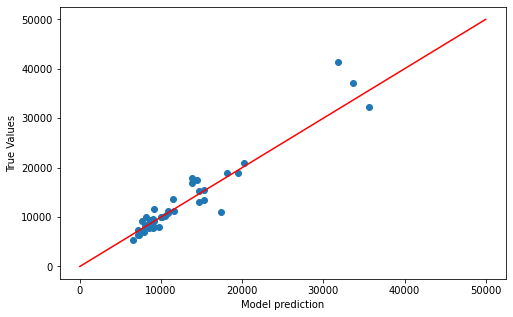

In [144]:
# trực quan hóa kết quả
plt.figure(figsize=(8,5))
plt.scatter(yhat_test,y_test)
plt.ylabel('True Values')
plt.xlabel('Model prediction')
plt.plot([0,50000],[0,50000],'r-')
plt.show()

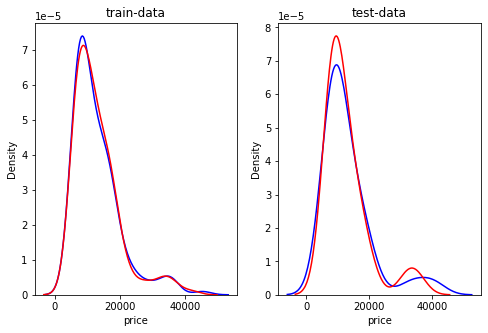

In [145]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.distplot(y_train,color='blue',label='Actual train values',hist=False)
sns.distplot(yhat_train,color='red',label='Predicted train values',hist=False)
plt.title('train-data')
plt.subplot(1,2,2)
sns.distplot(y_test,color='blue',label='Actual train values',hist=False)
sns.distplot(yhat_test,color='red',label='Predicted train values',hist=False)
plt.title('test-data')
plt.show()

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [147]:
mae_train = mean_absolute_error(y_train,yhat_train)
mae_test = mean_absolute_error(y_test,yhat_test)
print('The train MAE of price and predicted value:', mae_train)
print('The test MAE of price and predicted value:', mae_test)

The train MAE of price and predicted value: 1179.8202528994254
The test MAE of price and predicted value: 1519.3501439834863


In [148]:
# Tính R^2
print('The train R-Squared:',model.score(X_train,y_train))
print('The test R-Squared:',model.score(X_test,y_test))

The train R-Squared: 0.9529204983676527
The test R-Squared: 0.907766030776011


### Áp dụng Polynominal và đánh giá có tốt hơn LinearRegression không

In [149]:
from sklearn.preprocessing import PolynomialFeatures

In [150]:
pf=PolynomialFeatures(degree=2)

In [151]:
X_pf=pf.fit_transform(X)

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X_pf,y,random_state=0,test_size=0.20)

In [153]:
model.fit(X_train,y_train)

LinearRegression()

In [154]:
yhat_train = model.predict(X_train)

In [155]:
y_train[0:5]

153     7788
66     28248
26      8558
131    18620
146     6488
Name: price, dtype: int32

In [156]:
yhat_train[0:5]

array([ 7788.        , 28248.        ,  8558.00000001, 18619.99999998,
        6488.        ])

In [157]:
yhat_test = model.predict(X_test)

In [158]:
y_test[0:5]

18      6295
169     9988
106    16900
92      8249
176     7775
Name: price, dtype: int32

In [159]:
yhat_test[0:5]

array([ 14526.97397318,  10898.        ,   8478.18502519, -14136.99289464,
        63690.41011198])

In [160]:
mae_train = mean_absolute_error(y_train,yhat_train)
mae_test = mean_absolute_error(y_test,yhat_test)
print('The train MAE of price and predicted value:', mae_train)
print('The test MAE of price and predicted value:', mae_test)

The train MAE of price and predicted value: 72.79554911936005
The test MAE of price and predicted value: 28059.489604361228


In [161]:
# Tính R^2
print('The train R-Squared:',model.score(X_train,y_train))
print('The test R-Squared:',model.score(X_test,y_test))

The train R-Squared: 0.9988441007378597
The test R-Squared: -26.77968754503779


### Nhận xét: R^2 ra giá trị âm nên với Polynominal bậc 2 thì mô hình bị overfitting